In [86]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [87]:
# Load the dataset
file_path = 'terrorist-attacks.csv'
df = pd.read_csv(file_path)

In [88]:
df.head()

Entity Code  Year  Terrorist attacks  Terrorism deaths  \
0  Afghanistan  AFG  1970                  0                 0   
1  Afghanistan  AFG  1971                  0                 0   
2  Afghanistan  AFG  1972                  0                 0   
3  Afghanistan  AFG  1973                  1                 0   
4  Afghanistan  AFG  1974                  0                 0   

   Attack method: Hijacking  \
0                         0   
1                         0   
2                         0   
3                         0   
4                         0   

   Attack method: Hostage Taking (Barricade Incident)  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   Attack method: Unarmed Assault  \
0                               0   
1                               0   
2                               0   
3                               0   
4                               0   

   Attack method: Facility/Infrastructure Attack  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Attack method: Hostage Taking (Kidnapping)  ...  \
0                                           0  ...   
1                                           0  ...   
2                                           0  ...   
3                                           0  ...   
4                                           0  ...   

   Attack method: Armed Assault  Attack method: Bombing/Explosion  \
0                             0                                 0   
1                             0                                 0   
2                             0                                 0   
3                             0                                 0   
4                             0                                 0   

   Death Age 100+  Death Age: 51-99   Death Age : 21-50   Death Age : 11-20   \
0               0                  0                   0                   0   
1               0                  0                   0                   0   
2               0                  0                   0                   0   
3               0                  0                   0                   0   
4               0                  0                   0                   0   

   Death Age : 6-10   Death Age :  1-5  Terrorist Death Type : Suicide  \
0                  0                 0                               0   
1                  0                 0                               0   
2                  0                 0                               0   
3                  0                 0                               0   
4                  0                 0                               0   

   Terrorist Death Type : Killed  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0  

[5 rows x 21 columns]

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10517 entries, 0 to 10516
Data columns (total 21 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   Entity                                              10517 non-null  object
 1   Code                                                9263 non-null   object
 2   Year                                                10517 non-null  int64 
 3   Terrorist attacks                                   10517 non-null  int64 
 4   Terrorism deaths                                    10517 non-null  int64 
 5   Attack method: Hijacking                            10517 non-null  int64 
 6   Attack method: Hostage Taking (Barricade Incident)  10517 non-null  int64 
 7   Attack method: Unarmed Assault                      10517 non-null  int64 
 8   Attack method: Facility/Infrastructure Attack       10517 non-null  int64 
 9   Attack

In [90]:
df.isnull().sum()

Entity                                                   0
Code                                                  1254
Year                                                     0
Terrorist attacks                                        0
Terrorism deaths                                         0
Attack method: Hijacking                                 0
Attack method: Hostage Taking (Barricade Incident)       0
Attack method: Unarmed Assault                           0
Attack method: Facility/Infrastructure Attack            0
Attack method: Hostage Taking (Kidnapping)               0
Attack method: Assassination                             0
Attack method: Armed Assault                             0
Attack method: Bombing/Explosion                         0
Death Age 100+                                           0
Death Age: 51-99                                         0
Death Age : 21-50                                        0
Death Age : 11-20                                       

In [91]:
df.drop('Code',axis=1,inplace=True)

In [92]:
df.columns

Index(['Entity', 'Year', 'Terrorist attacks', 'Terrorism deaths',
       'Attack method: Hijacking',
       'Attack method: Hostage Taking (Barricade Incident)',
       'Attack method: Unarmed Assault',
       'Attack method: Facility/Infrastructure Attack',
       'Attack method: Hostage Taking (Kidnapping)',
       'Attack method: Assassination', 'Attack method: Armed Assault',
       'Attack method: Bombing/Explosion', 'Death Age 100+',
       'Death Age: 51-99 ', 'Death Age : 21-50 ', 'Death Age : 11-20 ',
       'Death Age : 6-10 ', 'Death Age :  1-5',
       'Terrorist Death Type : Suicide', 'Terrorist Death Type : Killed'],
      dtype='object')

## EDA

### Total Death of different age people in different year

In [93]:
g1 =df.groupby(['Year'])['Terrorist attacks'].sum().reset_index()
g1=g1.sort_index(ascending=False)

g2 =df.groupby(['Year'])['Terrorism deaths'].sum().reset_index()
g2=g2.sort_index(ascending=False)

g3 =df.groupby(['Year'])['Death Age 100+'].sum().reset_index()
g3=g3.sort_index(ascending=False)

g4 =df.groupby(['Year'])['Death Age: 51-99 '].sum().reset_index()
g4=g4.sort_index(ascending=False)

g5 =df.groupby(['Year'])['Death Age : 21-50 '].sum().reset_index()
g5=g5.sort_index(ascending=False)

g6 =df.groupby(['Year'])['Death Age : 11-20 '].sum().reset_index()
g6=g6.sort_index(ascending=False)

g7 =df.groupby(['Year'])['Death Age : 6-10 '].sum().reset_index()
g7=g7.sort_index(ascending=False)

g8 =df.groupby(['Year'])['Death Age :  1-5'].sum().reset_index()
g8=g8.sort_index(ascending=False)

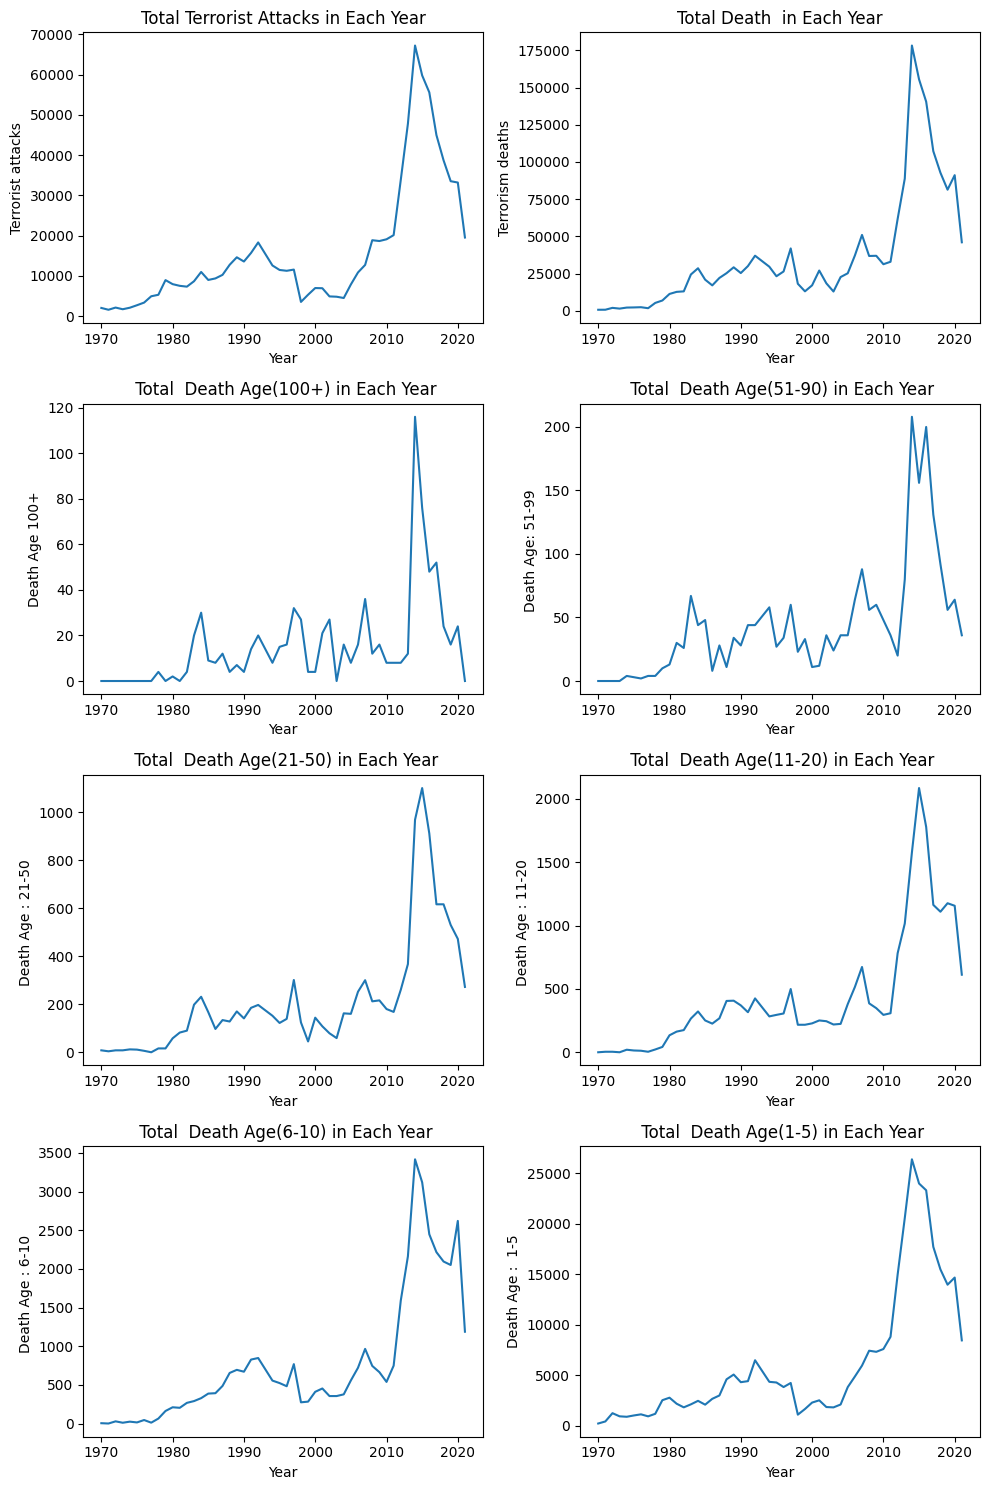

In [94]:
fig, axes = plt.subplots(4, 2, figsize=(10, 15))
# Here 3 means row and 2 means column


sns.lineplot(ax=axes[0, 0],data=g1, x='Year', y='Terrorist attacks')
axes[0, 0].set_title('Total Terrorist Attacks in Each Year')


sns.lineplot(ax=axes[0, 1],data=g2, x='Year', y='Terrorism deaths')
axes[0, 1].set_title('Total Death  in Each Year')



sns.lineplot(ax=axes[1, 0],data=g3, x='Year', y='Death Age 100+')
axes[1, 0].set_title(' Total  Death Age(100+) in Each Year')


sns.lineplot(ax=axes[1, 1],data=g4, x='Year', y='Death Age: 51-99 ')
axes[1, 1].set_title(' Total  Death Age(51-90) in Each Year')


sns.lineplot(ax=axes[2, 0],data=g5, x='Year', y='Death Age : 21-50 ')
axes[2, 0].set_title(' Total  Death Age(21-50) in Each Year')


sns.lineplot(ax=axes[2, 1],data=g6, x='Year', y='Death Age : 11-20 ')
axes[2, 1].set_title(' Total  Death Age(11-20) in Each Year')


sns.lineplot(ax=axes[3, 0],data=g7, x='Year', y='Death Age : 6-10 ')
axes[3, 0].set_title(' Total  Death Age(6-10) in Each Year')

sns.lineplot(ax=axes[3, 1],data=g8, x='Year', y='Death Age :  1-5')
axes[3, 1].set_title(' Total  Death Age(1-5) in Each Year')



plt.tight_layout()
plt.show()

In [95]:
df[df['Year']==2015]

Entity  Year  Terrorist attacks  Terrorism deaths  \
44             Afghanistan  2015               1928              6216   
95                  Africa  2015               3196             12411   
146                Albania  2015                  4                 0   
197                Algeria  2015                 15                20   
248                Andorra  2015                  0                 0   
...                    ...   ...                ...               ...   
10273                Yemen  2015                818              2506   
10324  Yemen Arab Republic  2015                  0                 0   
10408                Zaire  2015                  0                 0   
10459               Zambia  2015                  0                 0   
10510             Zimbabwe  2015                  0                 0   

       Attack method: Hijacking  \
44                            1   
95                           29   
146                           0   
197                           0   
248                           0   
...                         ...   
10273                         2   
10324                         0   
10408                         0   
10459                         0   
10510                         0   

       Attack method: Hostage Taking (Barricade Incident)  \
44                                                     9    
95                                                    34    
146                                                    0    
197                                                    0    
248                                                    0    
...                                                  ...    
10273                                                  5    
10324                                                  0    
10408                                                  0    
10459                                                  0    
10510                                                  0    

       Attack method: Unarmed Assault  \
44                                 15   
95                                 15   
146                                 0   
197                                 0   
248                                 0   
...                               ...   
10273                               0   
10324                               0   
10408                               0   
10459                               0   
10510                               0   

       Attack method: Facility/Infrastructure Attack  \
44                                                65   
95                                                82   
146                                                0   
197                                                0   
248                                                0   
...                                              ...   
10273                                             10   
10324                                              0   
10408                                              0   
10459                                              0   
10510                                              0   

       Attack method: Hostage Taking (Kidnapping)  \
44                                            194   
95                                            382   
146                                             0   
197                                             0   
248                                             0   
...                                           ...   
10273                                         152   
10324                                           0   
10408                                           0   
10459                                           0   
10510                                           0   

       Attack method: Assassination  Attack method: Armed Assault  \
44                              178                           541   
95                              183             

In [96]:
entity=df.groupby(['Entity'])['Terrorist attacks'].sum().reset_index()
entity=entity.sort_values(by="Terrorist attacks",ascending=False)
entity.reset_index(drop=True, inplace=True) 
top10=entity.loc[1:10]

### Top 10 most attacked Entity

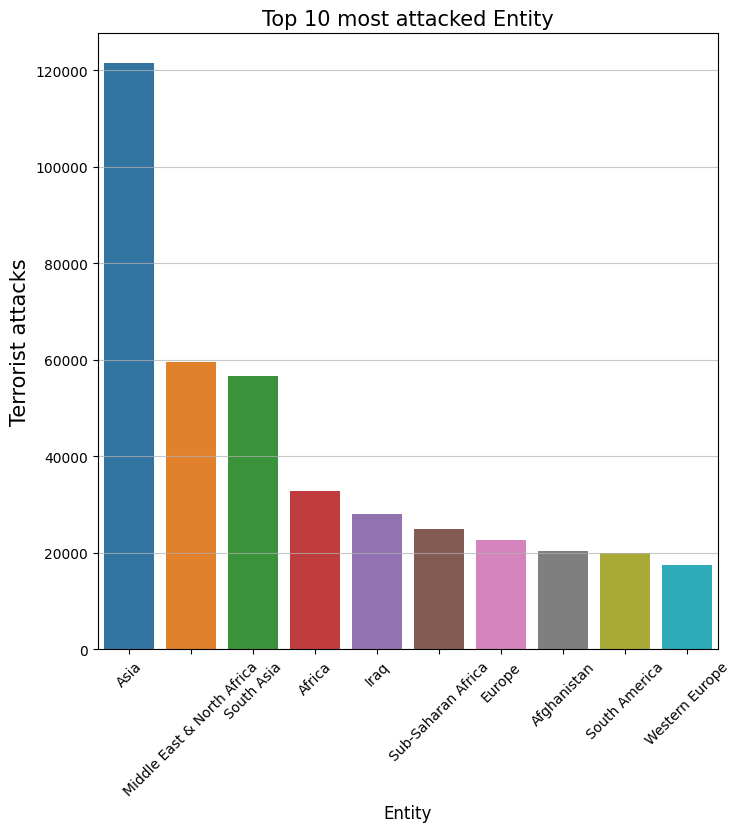

In [97]:
plt.figure(figsize=(8, 8))
sns.barplot(x="Entity",y="Terrorist attacks",data=top10)
plt.title("Top 10 most attacked Entity",fontsize=15)
plt.xlabel("Entity",fontsize=12)
plt.ylabel("Terrorist attacks",fontsize=15)
ax = plt.gca()
ax.grid(True, axis='y', linestyle='-', alpha=0.7) 
plt.xticks(rotation=45) 
plt.show()

### Top 10 most death happen by terrorist attacked in Entity

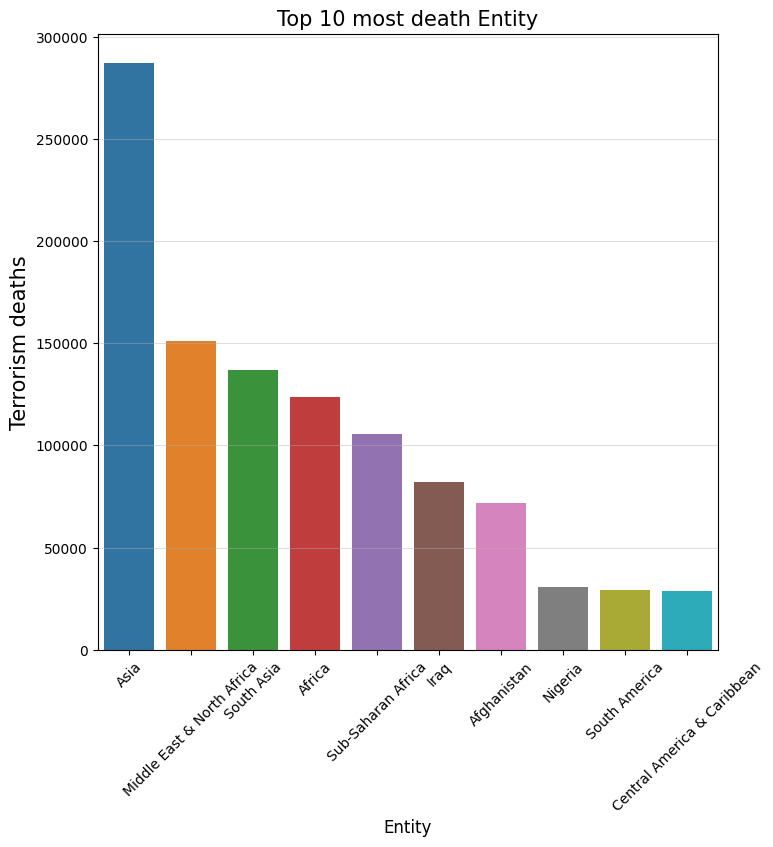

In [98]:
topdeath=df.groupby(['Entity'])['Terrorism deaths'].sum().reset_index()
topdeath=topdeath.sort_values(by="Terrorism deaths",ascending=False)
topdeath.reset_index(drop=True, inplace=True) 
topdeath=topdeath.loc[1:10]
plt.figure(figsize=(8, 8))
sns.barplot(x="Entity",y="Terrorism deaths",data=topdeath)
plt.title("Top 10 most death Entity",fontsize=15)
plt.xlabel("Entity",fontsize=12)
plt.ylabel("Terrorism deaths",fontsize=15)
ax = plt.gca()
ax.grid(True, axis='y', linestyle='-', alpha=0.4) 
plt.xticks(rotation=45) 
plt.show()

In [99]:
# Calculate the total death casualties from multiple columns for each entity and year in a DataFrame.
def calculate_death_casualties(df, entity_column, year_column, columns):
    # Calculate total death casualties for each row
    df['Death Casuality'] = df[columns].sum(axis=1)
    
    
    # Select relevant columns and drop duplicates
    result = df[[entity_column, year_column, 'Death Casuality']].drop_duplicates()

    return result

# Example usage:
# Define the columns containing death casualties
people_death = ['Death Age: 51-99 ', 'Death Age : 21-50 ', 'Death Age : 11-20 ', 'Death Age : 6-10 ', 'Death Age :  1-5']

# Calculate total death casualties for each entity and year
total_death_casualties = calculate_death_casualties(df, 'Entity', 'Year', people_death)
total_death_casualties.head()

Entity  Year  Death Casuality
0  Afghanistan  1970                0
1  Afghanistan  1971                0
2  Afghanistan  1972                0
3  Afghanistan  1973                0
4  Afghanistan  1974                0

In [100]:
df['Death Casuality'] = total_death_casualties['Death Casuality']
df.sample(10)

Entity  Year  Terrorist attacks  Terrorism deaths  \
9724            Uzbekistan  1997                  0                 0   
3631               Germany  1998                  6                 0   
70                  Africa  1989                299              1203   
1143               Bolivia  2004                  0                 0   
2291               Czechia  1994                  1                 0   
6115            Montenegro  2019                  0                 0   
10303  Yemen Arab Republic  1994                  0                 0   
9701               Uruguay  2004                  0                 0   
8904           Switzerland  1981                 13                 2   
4530                  Iraq  1978                  0                 0   

       Attack method: Hijacking  \
9724                          0   
3631                          0   
70                            1   
1143                          0   
2291                          0   
6115                          0   
10303                         0   
9701                          0   
8904                          1   
4530                          0   

       Attack method: Hostage Taking (Barricade Incident)  \
9724                                                   0    
3631                                                   0    
70                                                     2    
1143                                                   0    
2291                                                   0    
6115                                                   0    
10303                                                  0    
9701                                                   0    
8904                                                   0    
4530                                                   0    

       Attack method: Unarmed Assault  \
9724                                0   
3631                                3   
70                                  0   
1143                                0   
2291                                0   
6115                                0   
10303                               0   
9701                                0   
8904                                0   
4530                                0   

       Attack method: Facility/Infrastructure Attack  \
9724                                               0   
3631                                               2   
70                                                 4   
1143                                               0   
2291                                               1   
6115                                               0   
10303                                              0   
9701                                               0   
8904                                               3   
4530                                               0   

       Attack method: Hostage Taking (Kidnapping)  \
9724                                            0   
3631                                            0   
70                                              2   
1143                                            0   
2291                                            0   
6115                                            0   
10303                                           0   
9701                                            0   
8904                                            0   
4530                                            0   

       Attack method: Assassination  ...  Attack method: Bombing/Explosion  \
9724                              0  ...                                 0   
3631                              0  ...                                 1   
70                               45  ...                               143   
1143                              0  ...                                 0   
2291                              0  ...                                 0   
6115                              0  

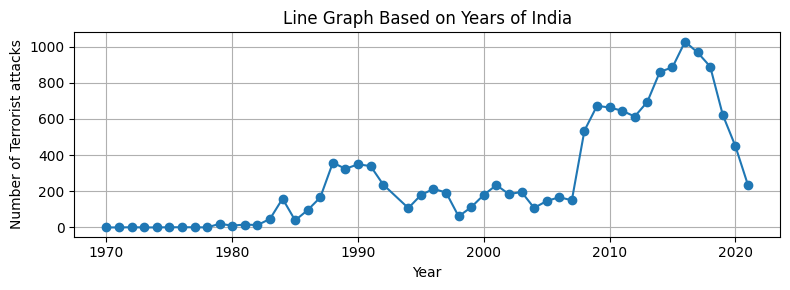

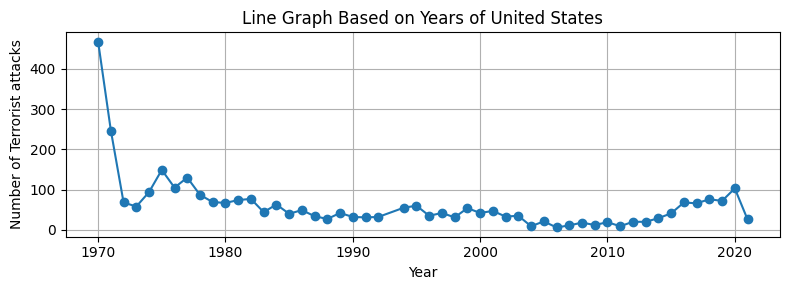

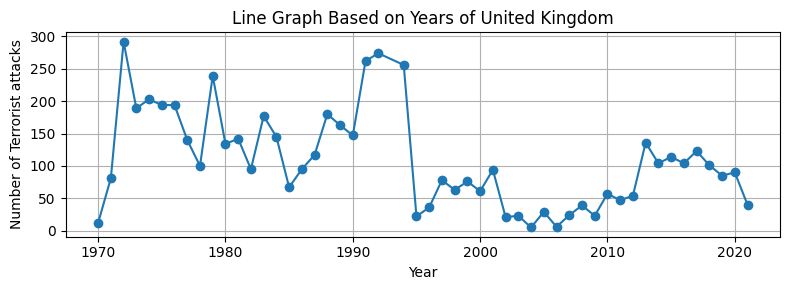

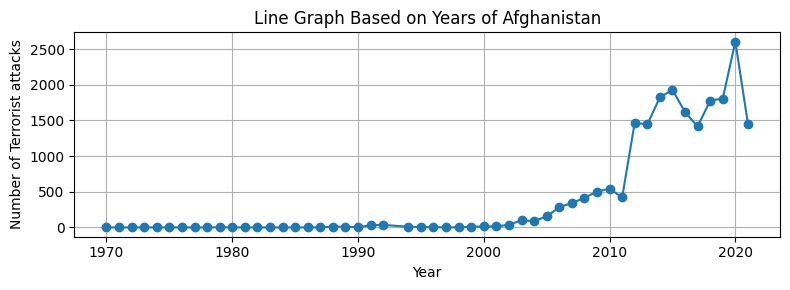

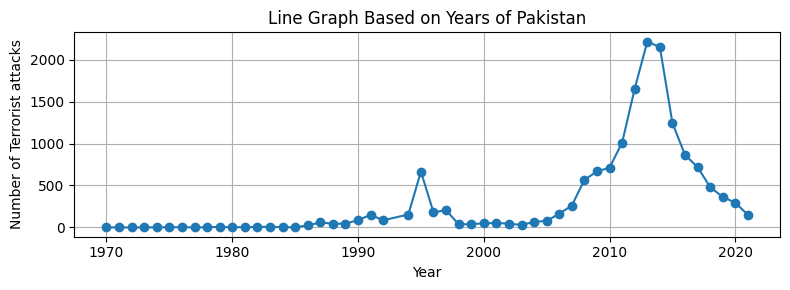

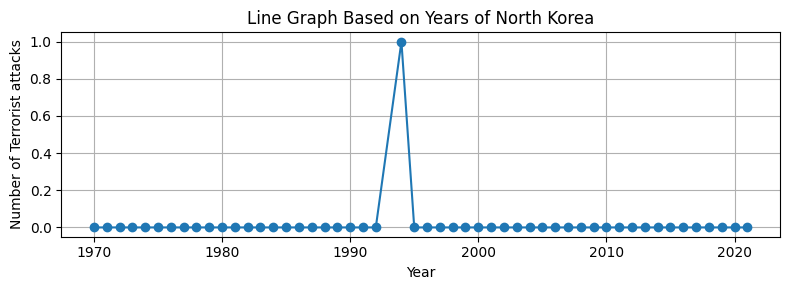

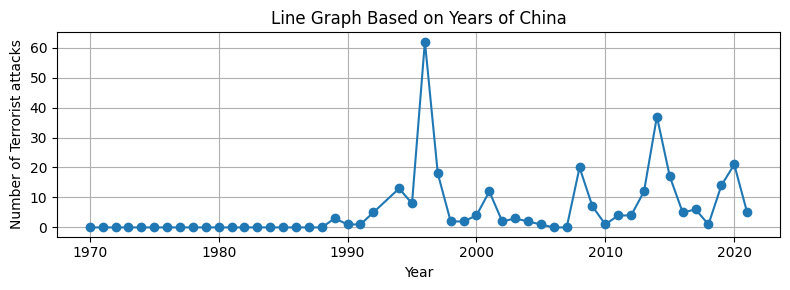

In [101]:
import matplotlib.pyplot as plt

def display_line_graph(X, Y, country, col):
    # Create the line plot
    plt.figure(figsize=(8, 3))  # Set figure size
    plt.plot(X, Y, marker='o', linestyle='-')  # Plot the data with markers on data points

    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel(f'Number of {col}')
    plt.title(f"Line Graph Based on Years of {country}")

    # Add gridlines
    plt.grid(True)

    # Display the plot
    plt.tight_layout()  # Adjust layout to fit labels without overlapping
    plt.show()

def plot_country_data(df, country, col):
    country_df = df[df['Entity'] == country]
    display_line_graph(country_df['Year'], country_df[col], country, col)

# Function to plot terrorist attacks for each country
def plot_terrorist_attacks_for_countries(df, countries):
    for country in countries:
        plot_country_data(df, country, 'Terrorist attacks')

# Function to plot death casualties for each country
def plot_death_casualties_for_countries(df, countries):
    for country in countries:
        plot_country_data(df, country, 'Death Casuality')

# List of countries to plot
country_to_see = ['India', 'United States', 'United Kingdom', 'Afghanistan', 'Pakistan', 'North Korea', 'China']

# Plot terrorist attacks for each country
plot_terrorist_attacks_for_countries(df, country_to_see)

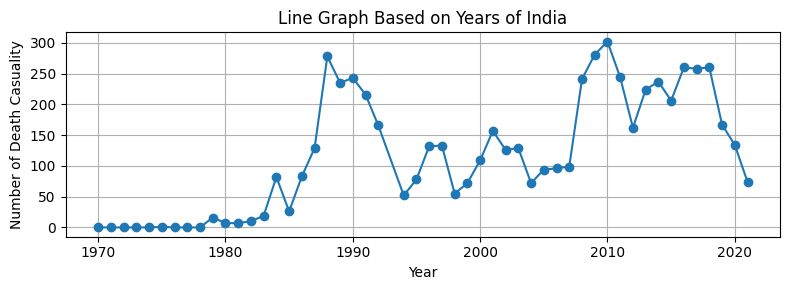

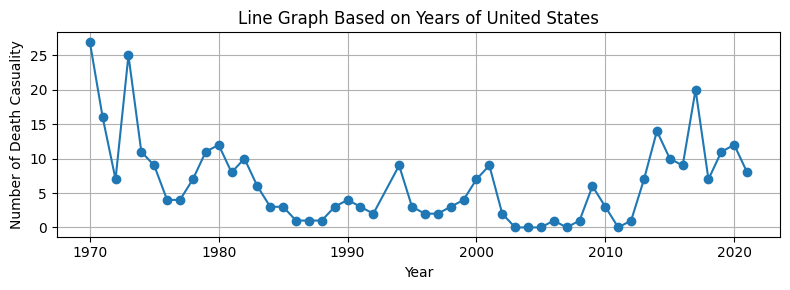

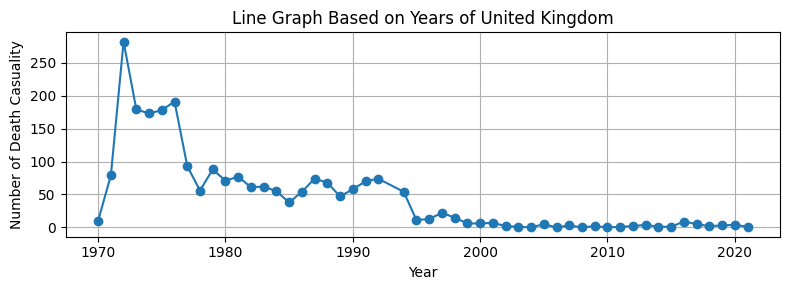

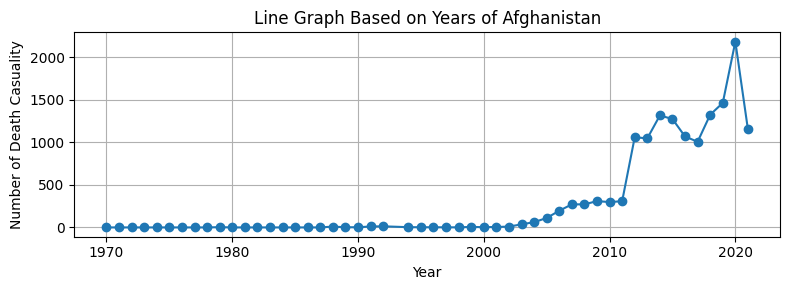

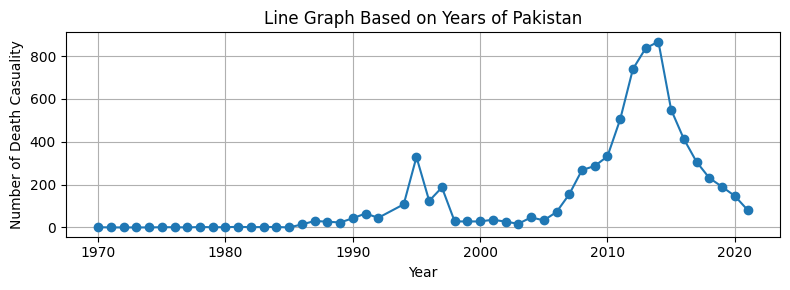

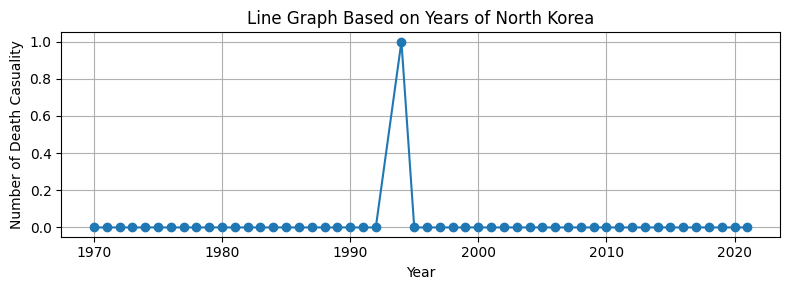

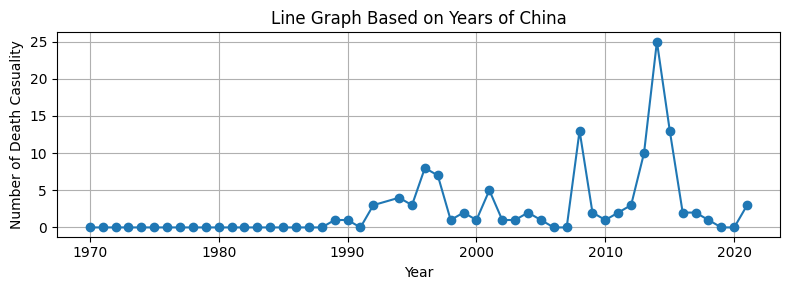

In [102]:
# Plot death casualties for each country
plot_death_casualties_for_countries(df, country_to_see)

### Observations on Terrorist Attacks Trend by Country

#### India:
India's graph shows an upward trend for terrorist attacks, indicating a rise in incidents over time.

#### USA and UK:
Both the USA and UK exhibit a downward trend for terrorist attacks, suggesting a decrease in incidents over time.

#### Afghanistan:
Afghanistan's graph shows an upward trend after 2001, possibly indicating an increase in terrorist attacks post that period.

#### Pakistan:
Pakistan's graph demonstrates growth in terrorist attacks during the mid-90s and mid-20s, followed by a continuous decrease in attacks after the mid-21s.

#### North Korea:
North Korea's graph shows a single attack in 1994, with no reported attacks before or after those years.

#### China:
China's graph displays a sudden spike in terrorist attacks with a few-year gap after the 1990s, indicating periods of increased terrorist activity during those times.

#### Casuality
Similar pattern we can notice in number of people died in terrorist attack

In [103]:
from PIL import Image

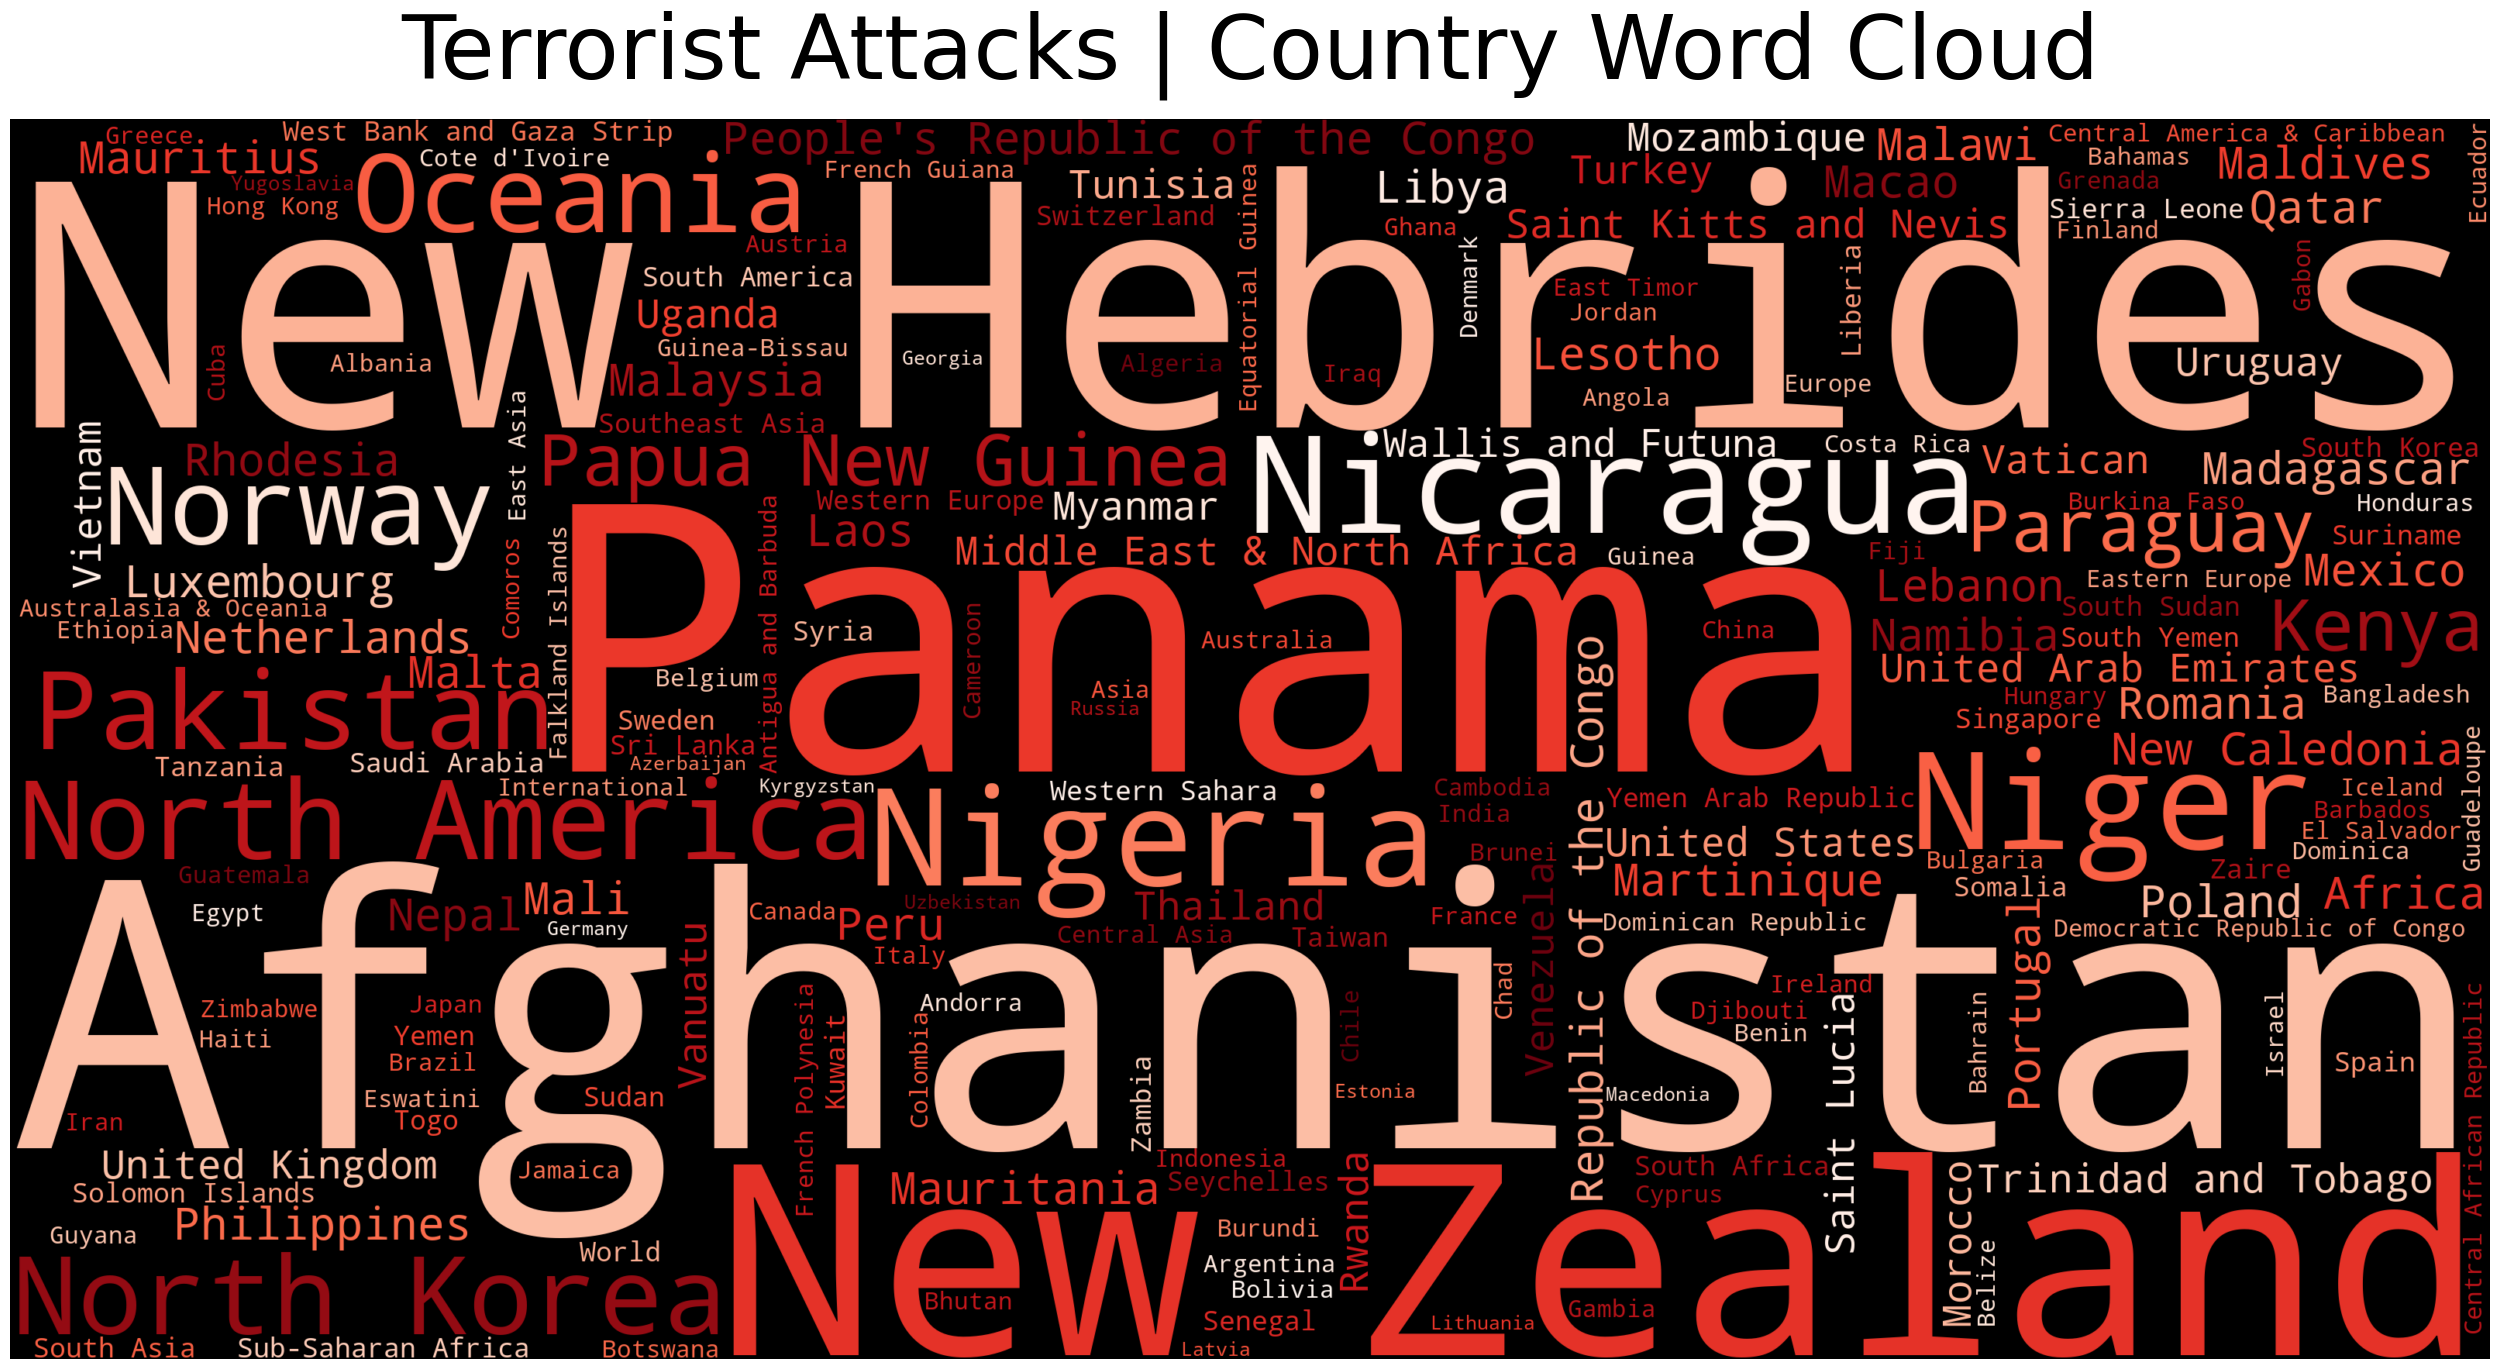

In [104]:
def generate_terrorist_wordcloud(dataframe, column_name, max_words=200, colormap='Reds'):
    # Read the bomb image as a mask
    # Count the occurrences of each value in the specified column
    word_counts = dataframe[column_name].value_counts()

    # Generate a word cloud with the bomb shape mask
    wordcloud = WordCloud(width=3200, height=1600,
                          max_words=max_words, colormap=colormap,
                          contour_color='white', contour_width=1,).generate_from_frequencies(word_counts)

    # Plot the WordCloud image
    plt.figure(figsize=(32, 50))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Terrorist Attacks | Country Word Cloud', fontsize=64, pad=30)
    plt.show()

# Example usage:
# Assuming you have a DataFrame named 'df' with a column named 'text_column'
# generate_terrorist_wordcloud(df, 'text_column')

    
import pandas as pd
#from fbprophet import Prophet

generate_terrorist_wordcloud(df,'Entity')

## Time-Series Analysis 

### Terrorist Attacks in India Past Over the Years 

In [105]:
from scipy import stats

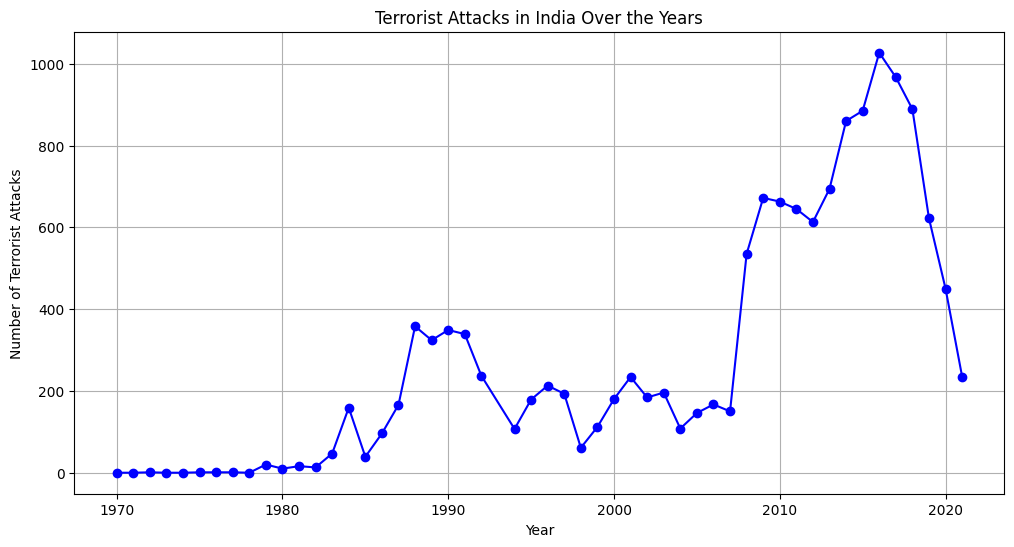

In [106]:
def terrorist_attacks_over_years(country_name):
    global india_df
    # Filter data for India
    india_df = df[df['Entity'] == country_name.title()]

    # EDA for Terrorist Attacks in India

    # Line Plot - Terrorist Attacks Over the Years
    plt.figure(figsize=(12, 6))
    plt.plot(india_df['Year'].to_numpy(), india_df['Terrorist attacks'].to_numpy(), marker='o', linestyle='-', color='b')
    plt.title(f'Terrorist Attacks in {country_name} Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Number of Terrorist Attacks')
    plt.grid(True)
    plt.show()

terrorist_attacks_over_years('India')

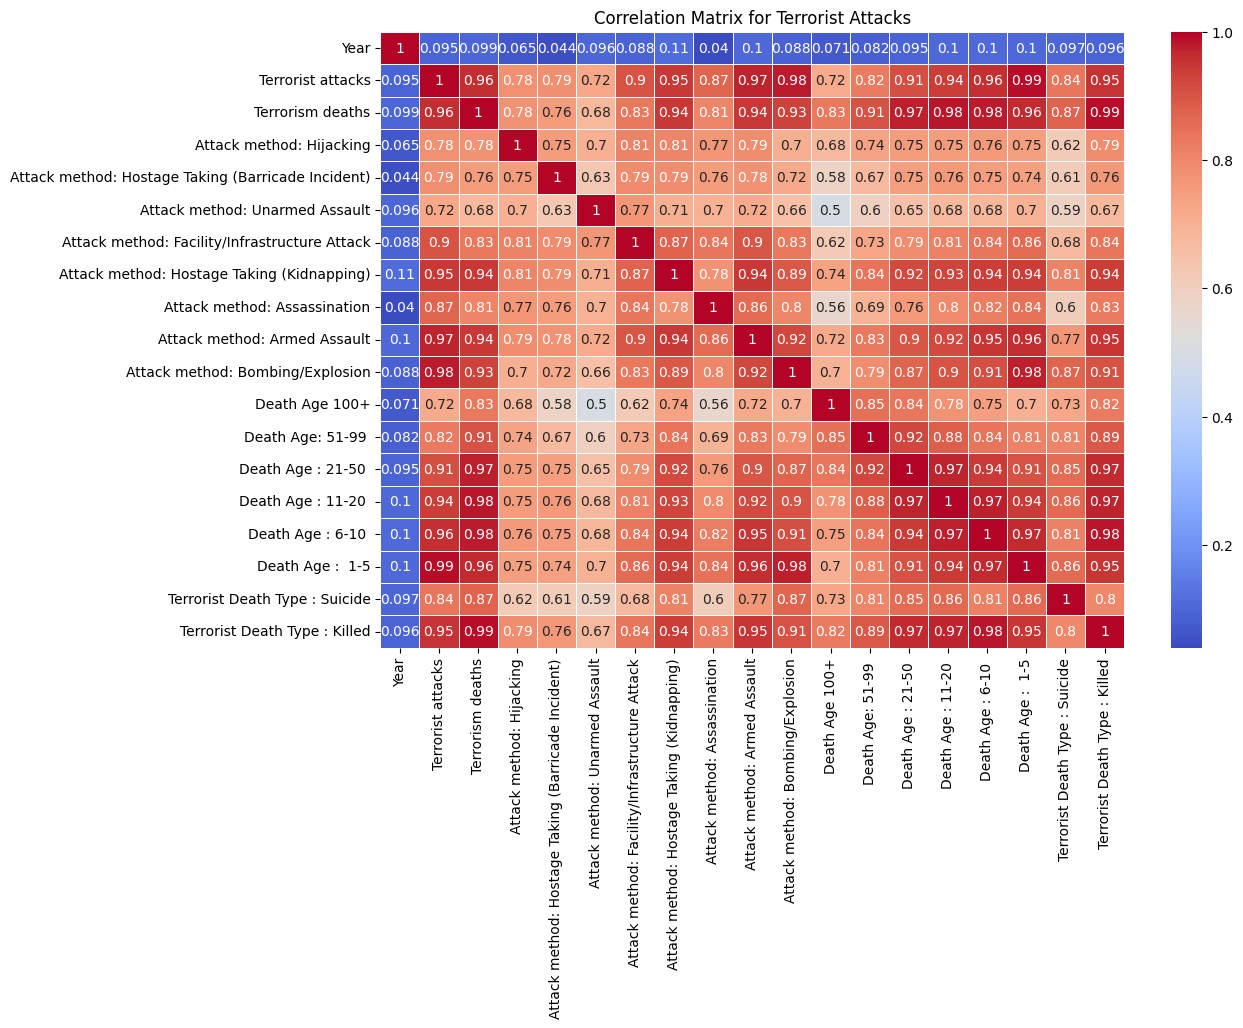

In [107]:
# Heatmap - Correlation Matrix
correlation_matrix = df[['Year', 'Terrorist attacks', 'Terrorism deaths',
       'Attack method: Hijacking',
       'Attack method: Hostage Taking (Barricade Incident)',
       'Attack method: Unarmed Assault',
       'Attack method: Facility/Infrastructure Attack',
       'Attack method: Hostage Taking (Kidnapping)',
       'Attack method: Assassination', 'Attack method: Armed Assault',
       'Attack method: Bombing/Explosion', 'Death Age 100+',
       'Death Age: 51-99 ', 'Death Age : 21-50 ', 'Death Age : 11-20 ',
       'Death Age : 6-10 ', 'Death Age :  1-5',
       'Terrorist Death Type : Suicide', 'Terrorist Death Type : Killed']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix for Terrorist Attacks')
plt.show()

In [108]:
# Import necessary libraries
import seaborn as sns
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA

C:\Users\Sumit\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sumit\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sumit\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sumit\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Forecast for Ukraine: 30    17.636593
31    32.374595
32    28.501899
33    26.637881
34    26.853570
35    24.448278
36    24.996188
37    26.757048
38    26.571861
39    26.173366
Name: predicted_mean, dtype: float64


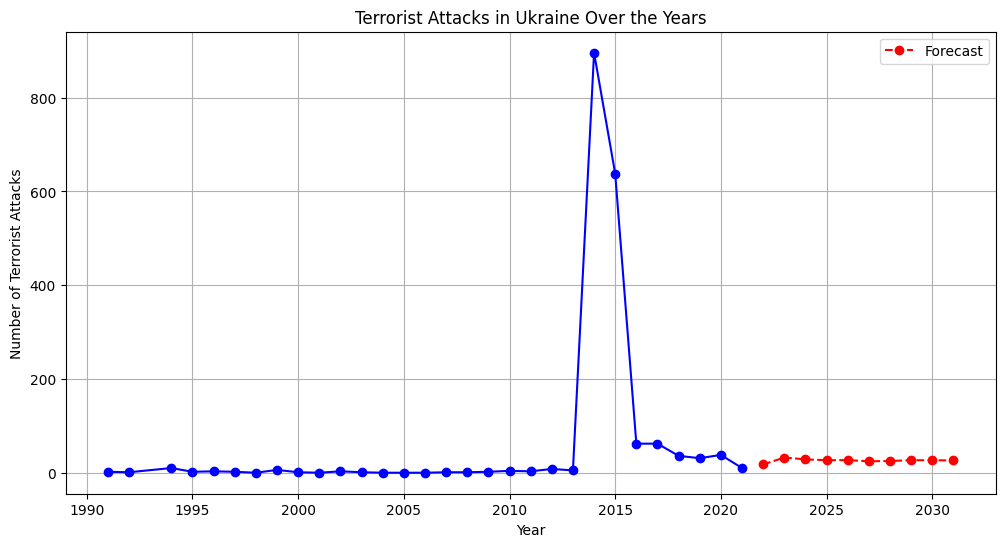

In [109]:
def terrorist_attacks_over_years(country_name):
    global india_df
    # Filter data for India
    india_df = df[df['Entity'] == country_name.title()]

    # EDA for Terrorist Attacks in India

    # Plot 1: Line Plot - Terrorist Attacks Over the Years
    plt.figure(figsize=(12, 6))
    plt.plot(india_df['Year'].to_numpy(), india_df['Terrorist attacks'].to_numpy(), marker='o', linestyle='-', color='b')
    plt.title(f'Terrorist Attacks in {country_name} Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Number of Terrorist Attacks')
    plt.grid(True)

    # Fit ARIMA model and display forecast
    country_df, country_model, country_forecast = fit_arima_model(country_name)
    print(f"Forecast for {country_name}: {country_forecast}")
    
    # Plot the forecast with a different color
    years_forecasted = np.arange(india_df['Year'].max() + 1, india_df['Year'].max() + 11)  # Ensure continuous x-axis values
    plt.plot(years_forecasted, country_forecast.to_numpy(), marker='o', linestyle='--', color='r', label='Forecast')
    plt.legend()
    
    plt.show()

# Insight: The line plot reveals the overall trend in terrorist attacks in India over the years. We can identify periods with increased or decreased activity.

def fit_arima_model(country):
    country_df = df[df['Entity'] == country]
    model = ARIMA(country_df['Terrorist attacks'], order=(5,1,0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=10)
    return country_df, model_fit, forecast

# Plot terrorist attacks over years for Afghanistan
terrorist_attacks_over_years('Ukraine')

In [110]:
india_df = df[df['Entity'] == 'India']
# Repeated Hypothesis Testing
other_countries_attacks = df[df['Entity'] == 'Pakistan']['Terrorist attacks']

print('Null Hypothesis: The mean number of terrorist attacks in India is equal to the mean number of terrorist attacks in other countries.')
print('Alternative Hypothesis: The means are different.')
t_stat, p_value = stats.ttest_ind(india_df['Terrorist attacks'], other_countries_attacks)

# Display hypothesis testing results
print('Repeated Hypothesis Testing Results:')
print('T-statistic:', t_stat)
print('P-value:', p_value)

# Insight 6: After conducting hypothesis testing, we find that there is a statistically significant difference in mean terrorist attacks between India and other countries.

if p_value<0.05:
    print('The p value is too low that means H0 should go!')
    print('So H1 is true')
    print('The mean terrorist attack in India is not equal to the mean terroist attacks happening all over the world.')
else:
    print('The p value is too high that means H1 should go!')
    print('So H0 is true')
    print('The mean terrorist attack in India is equal to the mean terroist attacks happening all over the world.')

Null Hypothesis: The mean number of terrorist attacks in India is equal to the mean number of terrorist attacks in other countries.
Alternative Hypothesis: The means are different.
Repeated Hypothesis Testing Results:
T-statistic: -0.34596738133398647
P-value: 0.7300940367591913
The p value is too high that means H1 should go!
So H0 is true
The mean terrorist attack in India is equal to the mean terroist attacks happening all over the world.


## Feature Engineering 

In [111]:
# Define the columns to be modified
age_columns = ['Death Age: 51-99 ', 'Death Age : 21-50 ', 'Death Age : 11-20 ', 'Death Age : 6-10 ', 'Death Age :  1-5']

# Apply the transformation to each column
for col in age_columns:
    df[col] = df[col].apply(lambda x: 1 if x > 0 else 0)

# Display the modified DataFrame
df.sample(5)

Entity  Year  Terrorist attacks  Terrorism deaths  \
854       Barbados  2000                  0                 0   
3139        Europe  1974                319               409   
6369         Nepal  2018                 99                 0   
8636         Spain  2020                  0                 0   
8278  South Africa  2019                 23                10   

      Attack method: Hijacking  \
854                          0   
3139                         0   
6369                         0   
8636                         0   
8278                         0   

      Attack method: Hostage Taking (Barricade Incident)  \
854                                                   0    
3139                                                  1    
6369                                                  0    
8636                                                  0    
8278                                                  0    

      Attack method: Unarmed Assault  \
854                                0   
3139                               2   
6369                               2   
8636                               0   
8278                               0   

      Attack method: Facility/Infrastructure Attack  \
854                                               0   
3139                                             25   
6369                                             14   
8636                                              0   
8278                                              7   

      Attack method: Hostage Taking (Kidnapping)  \
854                                            0   
3139                                           5   
6369                                           0   
8636                                           0   
8278                                           0   

      Attack method: Assassination  ...  Attack method: Bombing/Explosion  \
854                              0  ...                                 0   
3139                           136  ...                               127   
6369                             4  ...                                76   
8636                             0  ...                                 0   
8278                            10  ...                                 1   

      Death Age 100+  Death Age: 51-99   Death Age : 21-50   \
854                0                  0                   0   
3139               0                  1                   1   
6369               0                  0                   0   
8636               0                  0                   0   
8278               0                  0                   0   

      Death Age : 11-20   Death Age : 6-10   Death Age :  1-5  \
854                    0                  0                 0   
3139                   1                  1                 1   
6369                   0                  0                 0   
8636                   0                  0                 0   
8278                   0                  0                 1   

      Terrorist Death Type : Suicide  Terrorist Death Type : Killed  \
854                                0                              0   
3139                               0                            409   
6369                               0                              0   
8636                               0                              0   
8278                               0                             10   

      Death Casuality  
854                 0  
3139              195  
6369                0  
8636                0  
8278                9  

[5 rows x 21 columns]

In [112]:
# Count occurrences of 0 and non-zero values in the 'Death Casuality' column
death_casuality_counts = df['Death Casuality'].value_counts()

# Extract counts for 0 and non-zero values
zero_count = death_casuality_counts.get(0, 0)
non_zero_count = sum(death_casuality_counts) - zero_count

# Print the counts
print(f"Occurrences of 0 in 'Death Casuality': {zero_count}")
print(f"Occurrences of numbers greater than 0 in 'Death Casuality': {non_zero_count}")

print()

total_rows = len(df)
zero_percentage = (zero_count/total_rows)*100
non_zero_percentage = (non_zero_count/total_rows)*100
print(f"Percentage of occurrences of 0 in 'Death Casuality': {zero_percentage:.2f}%")
print(f"Percentage of occurrences of numbers greater than 0 in 'Death Casuality': {non_zero_percentage:.2f}%")

Occurrences of 0 in 'Death Casuality': 6940
Occurrences of numbers greater than 0 in 'Death Casuality': 3577

Percentage of occurrences of 0 in 'Death Casuality': 65.99%
Percentage of occurrences of numbers greater than 0 in 'Death Casuality': 34.01%


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10517 entries, 0 to 10516
Data columns (total 21 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   Entity                                              10517 non-null  object
 1   Year                                                10517 non-null  int64 
 2   Terrorist attacks                                   10517 non-null  int64 
 3   Terrorism deaths                                    10517 non-null  int64 
 4   Attack method: Hijacking                            10517 non-null  int64 
 5   Attack method: Hostage Taking (Barricade Incident)  10517 non-null  int64 
 6   Attack method: Unarmed Assault                      10517 non-null  int64 
 7   Attack method: Facility/Infrastructure Attack       10517 non-null  int64 
 8   Attack method: Hostage Taking (Kidnapping)          10517 non-null  int64 
 9   Attack

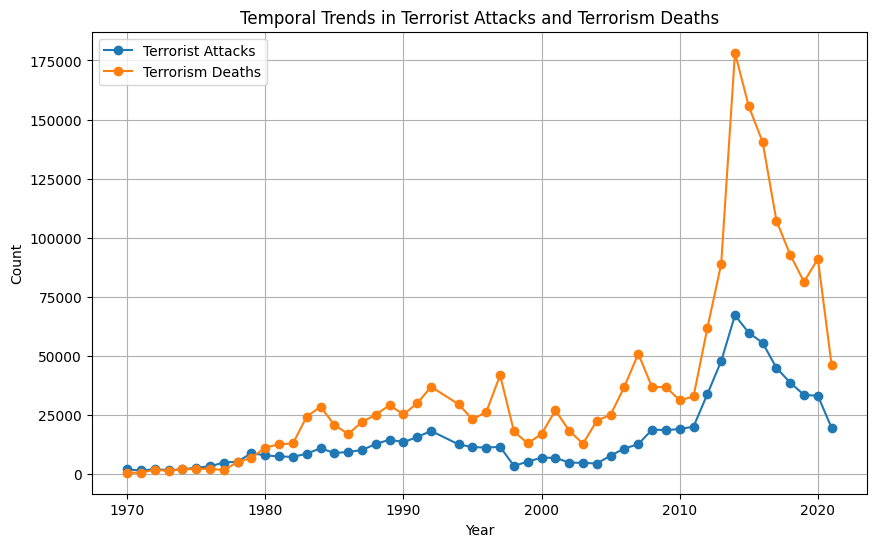

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouping data by year and calculating total terrorist attacks and deaths
yearly_data = df.groupby('Year').agg({
    'Terrorist attacks': 'sum',
    'Terrorism deaths': 'sum'
}).reset_index()

# Visualizing temporal trends
plt.figure(figsize=(10, 6))
plt.plot(yearly_data['Year'], yearly_data['Terrorist attacks'], label='Terrorist Attacks', marker='o')
plt.plot(yearly_data['Year'], yearly_data['Terrorism deaths'], label='Terrorism Deaths', marker='o')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Temporal Trends in Terrorist Attacks and Terrorism Deaths')
plt.legend()
plt.grid(True)
plt.show()


In [116]:
# Define weights for each attack method
attack_weights = {
    'Attack method: Hijacking': 1,
    'Attack method: Hostage Taking (Barricade Incident)': 2,
    'Attack method: Unarmed Assault': 1,
    'Attack method: Facility/Infrastructure Attack': 3,
    'Attack method: Hostage Taking (Kidnapping)': 1,
    'Attack method: Assassination': 2,
    'Attack method: Armed Assault': 3,
    'Attack method: Bombing/Explosion': 3
}

# Calculate Severity Score for each row
def calculate_severity_score(row):
    severity_score = sum(row[method] * weight for method, weight in attack_weights.items())
    return severity_score

# Apply the function to calculate Severity Score for each row
df['Attack Severity Score'] = df.apply(calculate_severity_score, axis=1)

# Check the updated DataFrame with the new feature
df.sample(5)


Entity  Year  Terrorist attacks  Terrorism deaths  \
4547          Iraq  1996                 12                11   
3169        Europe  2005                180               218   
8889        Sweden  2018                  6                 0   
4767       Jamaica  2012                  0                 0   
8017  Sierra Leone  2020                  0                 0   

      Attack method: Hijacking  \
4547                         0   
3169                         0   
8889                         0   
4767                         0   
8017                         0   

      Attack method: Hostage Taking (Barricade Incident)  \
4547                                                  0    
3169                                                  0    
8889                                                  0    
4767                                                  0    
8017                                                  0    

      Attack method: Unarmed Assault  \
4547                               0   
3169                               1   
8889                               0   
4767                               0   
8017                               0   

      Attack method: Facility/Infrastructure Attack  \
4547                                              0   
3169                                              9   
8889                                              3   
4767                                              0   
8017                                              0   

      Attack method: Hostage Taking (Kidnapping)  \
4547                                           0   
3169                                           0   
8889                                           0   
4767                                           0   
8017                                           0   

      Attack method: Assassination  ...  Death Age : 21-50   \
4547                             3  ...                   0   
3169                             7  ...                   1   
8889                             1  ...                   0   
4767                             0  ...                   0   
8017                             0  ...                   0   

      Death Age : 11-20   Death Age : 6-10   Death Age :  1-5  \
4547                   0                  0                 1   
3169                   1                  1                 1   
8889                   0                  0                 0   
4767                   0                  0                 0   
8017                   0                  0                 0   

      Terrorist Death Type : Suicide  Terrorist Death Type : Killed  \
4547                               0                             11   
3169                              56                            162   
8889                               0                              0   
4767                               0                              0   
8017                               0                              0   

      Death Casuality  Attack_Death_Interact  Bombing_Death_Interact  \
4547                5                    132                      66   
3169               43                  39240                   28994   
8889                0                      0                       0   
4767                0                      0                       0   
8017                0                      0                       0   

      Attack Severity Score  
4547                     30  
3169                    531  
8889                     17  
4767                      0  
8017                      0  

[5 rows x 24 columns]

In [117]:
# Interaction between 'Terrorist attacks' and 'Terrorism deaths'
df['Attack_Death_Interact'] = df['Terrorist attacks'] * df['Terrorism deaths']

# Interaction between 'Attack method: Bombing/Explosion' and 'Terrorism deaths'
df['Bombing_Death_Interact'] = df['Attack method: Bombing/Explosion'] * df['Terrorism deaths']

# Interaction between 'Terrorist attacks' and 'Attack Severity Score'
df['Attack_Severity_Interact'] = df['Terrorist attacks'] * df['Attack Severity Score']

# Interaction between 'Year' and 'Terrorist attacks'
df['Year_Attack_Interact'] = df['Year'] * df['Terrorist attacks']

In [118]:
from sklearn.preprocessing import MinMaxScaler

# Select the interaction features to normalize
interaction_features = ['Attack_Death_Interact', 'Bombing_Death_Interact', 'Attack_Severity_Interact', 'Year_Attack_Interact']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the interaction features
df[interaction_features] = scaler.fit_transform(df[interaction_features])

# Check the updated DataFrame with normalized interaction features
df.head()

Entity  Year  Terrorist attacks  Terrorism deaths  \
0  Afghanistan  1970                  0                 0   
1  Afghanistan  1971                  0                 0   
2  Afghanistan  1972                  0                 0   
3  Afghanistan  1973                  1                 0   
4  Afghanistan  1974                  0                 0   

   Attack method: Hijacking  \
0                         0   
1                         0   
2                         0   
3                         0   
4                         0   

   Attack method: Hostage Taking (Barricade Incident)  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   Attack method: Unarmed Assault  \
0                               0   
1                               0   
2                               0   
3                               0   
4                               0   

   Attack method: Facility/Infrastructure Attack  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Attack method: Hostage Taking (Kidnapping)  Attack method: Assassination  \
0                                           0                             0   
1                                           0                             0   
2                                           0                             0   
3                                           0                             0   
4                                           0                             0   

   ...  Death Age : 6-10   Death Age :  1-5  Terrorist Death Type : Suicide  \
0  ...                  0                 0                               0   
1  ...                  0                 0                               0   
2  ...                  0                 0                               0   
3  ...                  0                 0                               0   
4  ...                  0                 0                               0   

   Terrorist Death Type : Killed  Death Casuality  Attack_Death_Interact  \
0                              0                0                    0.0   
1                              0                0                    0.0   
2                              0                0                    0.0   
3                              0                0                    0.0   
4                              0                0                    0.0   

   Bombing_Death_Interact  Attack Severity Score  Attack_Severity_Interact  \
0                     0.0                      0                       0.0   
1                     0.0                      0                       0.0   
2                     0.0                      0                       0.0   
3                     0.0                      0                       0.0   
4                     0.0                      0                       0.0   

   Year_Attack_Interact  
0              0.000000  
1              0.000000  
2              0.000000  
3              0.000058  
4              0.000000  

[5 rows x 26 columns]

In [119]:
import pandas as pd

numeric_features = df.drop(['Entity', 'Year'], axis=1)

# Calculate the correlation matrix
correlation_matrix = numeric_features.corr()

# Extract correlation with the target variable
target_correlation = correlation_matrix['Death Casuality']

# Sort correlations in descending order
sorted_correlation = target_correlation.sort_values(ascending=False)

# Print correlation values
print(sorted_correlation)


Death Casuality                                       1.000000
Year_Attack_Interact                                  0.990096
Terrorist attacks                                     0.989844
Attack Severity Score                                 0.984839
Terrorism deaths                                      0.974808
Attack method: Bombing/Explosion                      0.969343
Attack method: Armed Assault                          0.963758
Terrorist Death Type : Killed                         0.963140
Attack method: Hostage Taking (Kidnapping)            0.944165
Attack_Severity_Interact                              0.860871
Terrorist Death Type : Suicide                        0.860633
Attack method: Facility/Infrastructure Attack         0.858690
Attack_Death_Interact                                 0.851288
Attack method: Assassination                          0.842495
Bombing_Death_Interact                                0.841539
Attack method: Hijacking                              0

In [120]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

# Define your features and target variable
# Assuming 'df' is your DataFrame and 'Death Casuality' is your target variable
X = df.drop(['Entity', 'Year', 'Death Casuality'], axis=1)  # Features
y = df['Death Casuality']  # Target variable

# Select the top k features based on chi-squared test for categorical variables
# Change k to the number of top features you want to select
k_chi2 = 10
chi2_selector = SelectKBest(score_func=chi2, k=k_chi2)
X_chi2_selected = chi2_selector.fit_transform(X, y)

# Select the top k features based on ANOVA F-test for numerical variables
# Change k to the number of top features you want to select
k_f_classif = 10
f_classif_selector = SelectKBest(score_func=f_classif, k=k_f_classif)
X_f_classif_selected = f_classif_selector.fit_transform(X, y)

# Get the selected feature names
selected_chi2_features = X.columns[chi2_selector.get_support()]
selected_f_classif_features = X.columns[f_classif_selector.get_support()]

# Print the selected feature names
print("Top", k_chi2, "features selected using chi-squared test:", selected_chi2_features)
print("Top", k_f_classif, "features selected using ANOVA F-test:", selected_f_classif_features)

Top 10 features selected using chi-squared test: Index(['Terrorist attacks', 'Terrorism deaths',
       'Attack method: Facility/Infrastructure Attack',
       'Attack method: Hostage Taking (Kidnapping)',
       'Attack method: Assassination', 'Attack method: Armed Assault',
       'Attack method: Bombing/Explosion', 'Terrorist Death Type : Suicide',
       'Terrorist Death Type : Killed', 'Attack Severity Score'],
      dtype='object')
Top 10 features selected using ANOVA F-test: Index(['Terrorist attacks', 'Terrorism deaths', 'Attack method: Armed Assault',
       'Attack method: Bombing/Explosion', 'Terrorist Death Type : Killed',
       'Attack_Death_Interact', 'Bombing_Death_Interact',
       'Attack Severity Score', 'Attack_Severity_Interact',
       'Year_Attack_Interact'],
      dtype='object')


In [121]:
pip install geopandas matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10517 entries, 0 to 10516
Data columns (total 26 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Entity                                              10517 non-null  object 
 1   Year                                                10517 non-null  int64  
 2   Terrorist attacks                                   10517 non-null  int64  
 3   Terrorism deaths                                    10517 non-null  int64  
 4   Attack method: Hijacking                            10517 non-null  int64  
 5   Attack method: Hostage Taking (Barricade Incident)  10517 non-null  int64  
 6   Attack method: Unarmed Assault                      10517 non-null  int64  
 7   Attack method: Facility/Infrastructure Attack       10517 non-null  int64  
 8   Attack method: Hostage Taking (Kidnapping)          10517 non-null  int64  


In [130]:
# Group by 'Entity' (country) and 'Year', then sum the 'Death Casuality' column
country_year_death = df.groupby(['Entity', 'Year'])['Death Casuality'].sum().reset_index()

In [141]:
import pandas as pd

# Create an empty list to store the results
cumulative_death_data = []

# Iterate over each country
for country in country_year_death['Entity'].unique():
    # Initialize cumulative death casuality
    cumulative_death = 0
    
    # Iterate over each year range from 1970 to 2021
    for year in range(1970, 2022):
        # Sum the death casuality for the current country and year
        death_casuality = country_year_death[(country_year_death['Entity'] == country) & (country_year_death['Year'] == year)]['Death Casuality'].sum()
        cumulative_death += death_casuality
    
    # Append the result to the list
    cumulative_death_data.append({
        'Entity': country,
        'Year Range': '1970 - 2021',
        'Cumulative Death Casuality': cumulative_death
    })

# Create a DataFrame from the list
cumulative_death_df = pd.DataFrame(cumulative_death_data)

cumulative_death_df


Entity   Year Range  Cumulative Death Casuality
0            Afghanistan  1970 - 2021                       14822
1                 Africa  1970 - 2021                       18548
2                Albania  1970 - 2021                          20
3                Algeria  1970 - 2021                        1953
4                Andorra  1970 - 2021                           0
..                   ...          ...                         ...
216  Yemen Arab Republic  1970 - 2021                           3
217           Yugoslavia  1970 - 2021                          60
218                Zaire  1970 - 2021                          28
219               Zambia  1970 - 2021                          25
220             Zimbabwe  1970 - 2021                          52

[221 rows x 3 columns]

In [146]:
# Replace "United States" with "United States of America" in the Entity column
cumulative_death_df['Entity'] = cumulative_death_df['Entity'].replace('United States', 'United States of America')

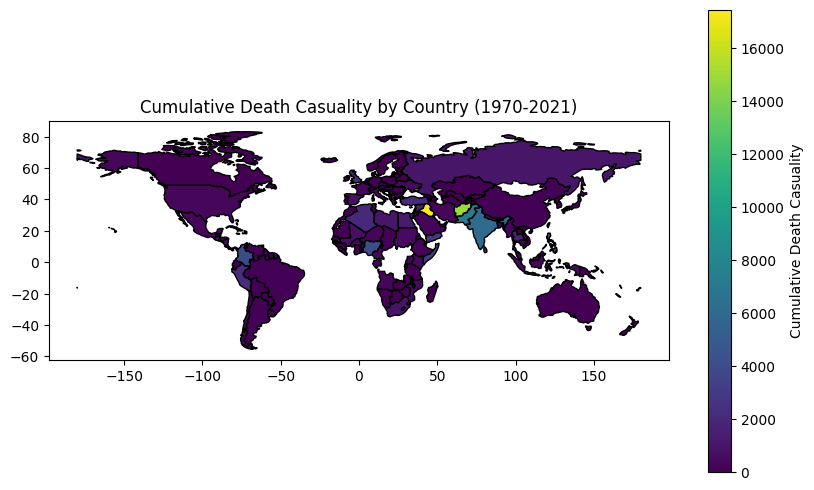

In [148]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world map dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map dataset with the cumulative death DataFrame
world_cumulative = world.merge(cumulative_death_df, how='left', left_on='name', right_on='Entity')

# Plot the world map with the cumulative death casuality
fig, ax = plt.subplots(figsize=(10, 6))
world_cumulative.plot(column='Cumulative Death Casuality', ax=ax, legend=True,
                      legend_kwds={'label': "Cumulative Death Casuality"},
                      cmap='viridis', edgecolor='k')
ax.set_title('Cumulative Death Casuality by Country (1970-2021)')
plt.show()


In [169]:
# List of countries with a high chance of death casualties
high_chance_countries = ['Iraq', 'India', 'Pakistan', 'Afghanistan']

# Create a new column 'High Chance of Death Casuality' and set default value to 0
df['High Chance of Death Casuality'] = 0

# Set value to 1 for countries with high chance
df.loc[df['Entity'].isin(high_chance_countries), 'High Chance of Death Casuality'] = 1
df.head()

Entity  Year  Terrorist attacks  Terrorism deaths  \
0  Afghanistan  1970                  0                 0   
1  Afghanistan  1971                  0                 0   
2  Afghanistan  1972                  0                 0   
3  Afghanistan  1973                  1                 0   
4  Afghanistan  1974                  0                 0   

   Attack method: Hijacking  \
0                         0   
1                         0   
2                         0   
3                         0   
4                         0   

   Attack method: Hostage Taking (Barricade Incident)  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   Attack method: Unarmed Assault  \
0                               0   
1                               0   
2                               0   
3                               0   
4                               0   

   Attack method: Facility/Infrastructure Attack  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Attack method: Hostage Taking (Kidnapping)  Attack method: Assassination  \
0                                           0                             0   
1                                           0                             0   
2                                           0                             0   
3                                           0                             0   
4                                           0                             0   

   ...  Death Age :  1-5  Terrorist Death Type : Suicide  \
0  ...                 0                               0   
1  ...                 0                               0   
2  ...                 0                               0   
3  ...                 0                               0   
4  ...                 0                               0   

   Terrorist Death Type : Killed  Death Casuality  Attack_Death_Interact  \
0                              0                0                    0.0   
1                              0                0                    0.0   
2                              0                0                    0.0   
3                              0                0                    0.0   
4                              0                0                    0.0   

   Bombing_Death_Interact  Attack Severity Score  Attack_Severity_Interact  \
0                     0.0                      0                       0.0   
1                     0.0                      0                       0.0   
2                     0.0                      0                       0.0   
3                     0.0                      0                       0.0   
4                     0.0                      0                       0.0   

   Year_Attack_Interact  High Chance of Death Casuality  
0              0.000000                               1  
1              0.000000                               1  
2              0.000000                               1  
3              0.000058                               1  
4              0.000000                               1  

[5 rows x 27 columns]

train

LinearRegression Mean Squared Error: 449.32002462853
LinearRegression R-squared: 0.9940264847380811


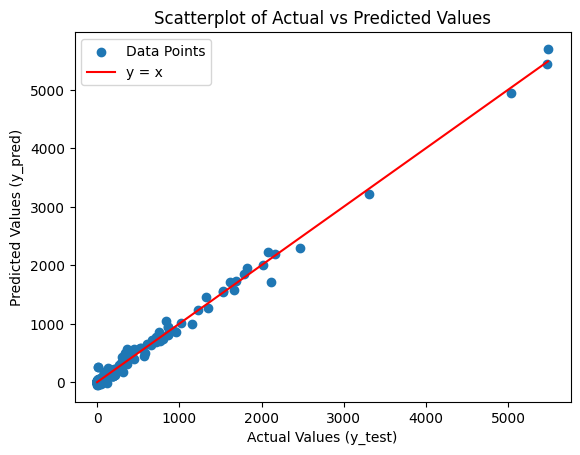


------------------------------------------------------------

Lasso Mean Squared Error: 533.6933554226532
Lasso R-squared: 0.9929047778219153


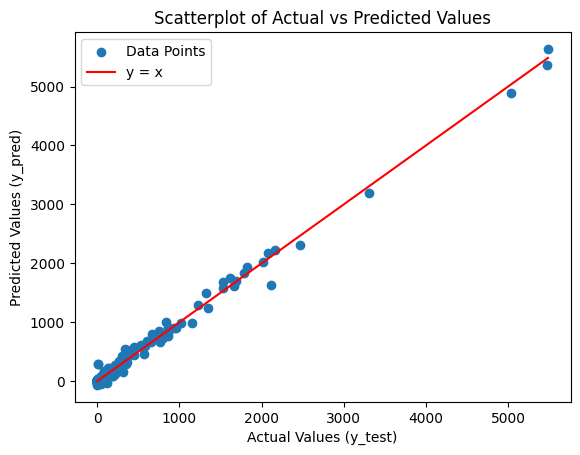


------------------------------------------------------------

DecisionTreeRegressor Mean Squared Error: 1708.4308101495355
DecisionTreeRegressor R-squared: 0.977287151787197


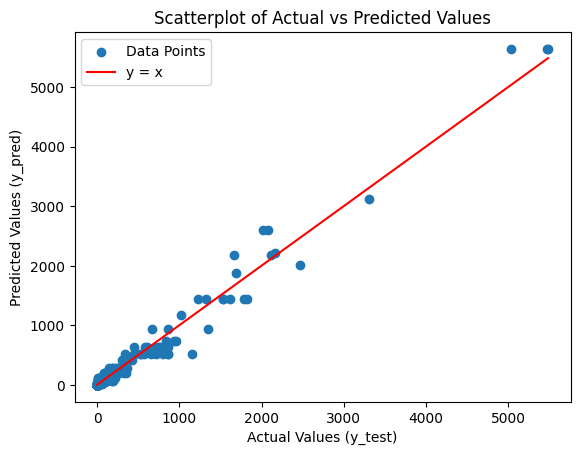


------------------------------------------------------------

RandomForestRegressor Mean Squared Error: 1053.8239462898566
RandomForestRegressor R-squared: 0.9859898667286365


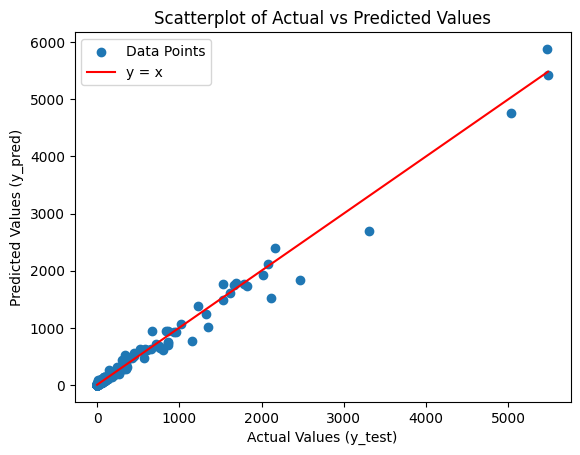


------------------------------------------------------------

The best model after grid search is LinearRegression with Mean Squared Error: 449.32002462853
Best hyperparameters: {}


In [213]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

def grid_search_best_model(X, y):
    # Feature scaling using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Initialize regressors
    linear_reg = LinearRegression()
    lasso_reg = Lasso()
    decision_tree_reg = DecisionTreeRegressor(random_state=42)
    random_forest_reg = RandomForestRegressor(random_state=42)

    # Define the parameter grid for each regressor
    param_grid_linear = {}
    param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
    param_grid_decision_tree = {'max_depth': [None, 5, 10, 15, 20]}
    param_grid_random_forest = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10, 15]}

    model_param_grids = {
        linear_reg: param_grid_linear,
        lasso_reg: param_grid_lasso,
        decision_tree_reg: param_grid_decision_tree,
        random_forest_reg: param_grid_random_forest,
    }

    best_model = None
    best_metric = float('inf')
    best_params = None

    for model, param_grid in model_param_grids.items():
        # Perform grid search using cross-validation
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Get the best model from grid search
        best_model_candidate = grid_search.best_estimator_
        best_params_candidate = grid_search.best_params_

        # Evaluate on the test set
        y_pred = best_model_candidate.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f'{model.__class__.__name__} Mean Squared Error: {mse}')
        print(f'{model.__class__.__name__} R-squared: {r2}')

        # Compare metrics and update the best model
        if mse < best_metric:
            best_metric = mse
            best_model = best_model_candidate
            best_params = best_params_candidate
            
        # Create a scatterplot
        plt.scatter(y_test, y_pred, label='Data Points')

        # Add the diagonal line y = x for reference
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='y = x')

        # Add labels and a title
        plt.xlabel("Actual Values (y_test)")
        plt.ylabel("Predicted Values (y_pred)")
        plt.title("Scatterplot of Actual vs Predicted Values")

        # Add legend
        plt.legend()

        # Show the plot
        plt.show()


        print('\n' + '-'*60 + '\n')

    print(f'The best model after grid search is {best_model.__class__.__name__} with Mean Squared Error: {best_metric}')
    print(f'Best hyperparameters: {best_params}')

    return best_model

# Separate features and target variable
X = df.drop(['Entity', 'Year', 'Death Casuality'], axis=1)  # Features
y = df['Death Casuality']  # Target variable

# Call the function to perform grid search and train the best model
best_model = grid_search_best_model(X, y)


filter

correlation_matrix

Death Casuality                                       1.000000
Year_Attack_Interact                                  0.990096
Terrorist attacks                                     0.989844
Attack Severity Score                                 0.984839
Terrorism deaths                                      0.974808
Attack method: Bombing/Explosion                      0.969343
Attack method: Armed Assault                          0.963758
Terrorist Death Type : Killed                         0.963140
Attack method: Hostage Taking (Kidnapping)            0.944165
Attack_Severity_Interact                              0.860871
Terrorist Death Type : Suicide                        0.860633
Attack method: Facility/Infrastructure Attack         0.858690
Attack_Death_Interact                                 0.851288
Attack method: Assassination                          0.842495
Bombing_Death_Interact                                0.841539
Attack method: Hijacking                              0

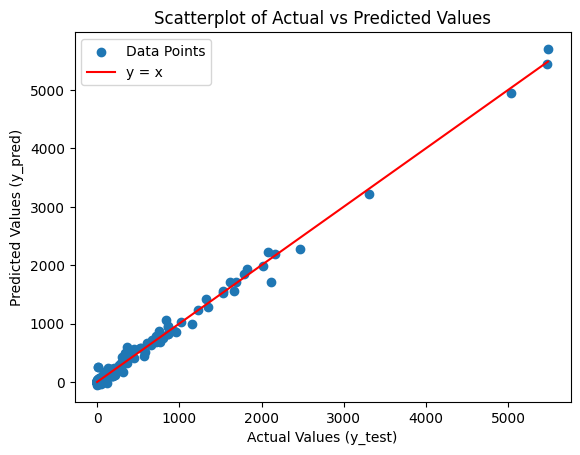


------------------------------------------------------------

Lasso Mean Squared Error: 542.7551779929645
Lasso R-squared: 0.992784304812796


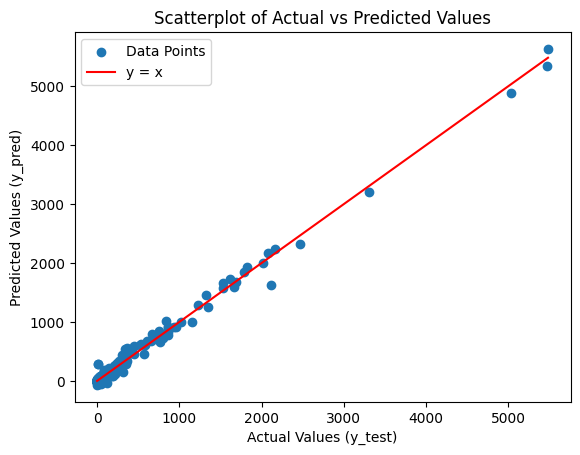


------------------------------------------------------------

DecisionTreeRegressor Mean Squared Error: 3505.0651140684413
DecisionTreeRegressor R-squared: 0.9534016762991654


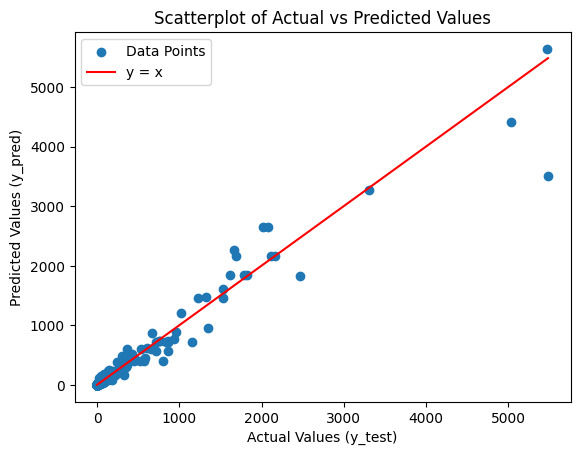


------------------------------------------------------------

RandomForestRegressor Mean Squared Error: 1172.6820920061261
RandomForestRegressor R-squared: 0.9844096991230942


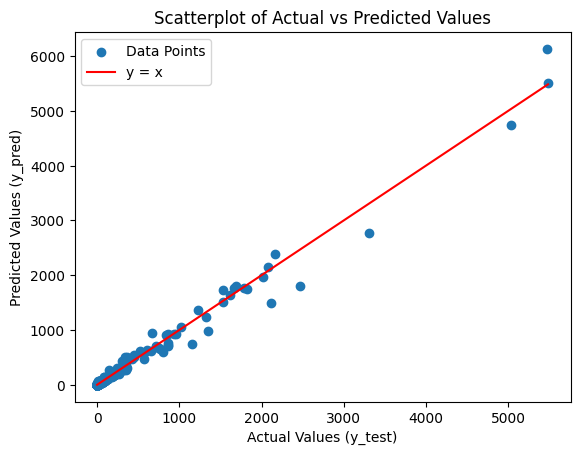


------------------------------------------------------------

The best model after grid search is LinearRegression with Mean Squared Error: 451.5923148959628
Best hyperparameters: {}


In [214]:
import pandas as pd

numeric_features = df.drop(['Entity', 'Year'], axis=1)

# Calculate the correlation matrix
correlation_matrix = numeric_features.corr()

# Extract correlation with the target variable
target_correlation = correlation_matrix['Death Casuality']

# Sort correlations in descending order
sorted_correlation = target_correlation.sort_values(ascending=False)

# Print correlation values
print(sorted_correlation)

# Separate features and target variable
X = df.drop(['Entity', 'Year', 'Death Casuality','Death Age: 51-99 ', 'Death Age : 21-50 ', 'Death Age : 11-20 ','Death Age : 6-10 ', 'Death Age :  1-5','High Chance of Death Casuality'], axis=1)  # Features
y = df['Death Casuality']  # Target variable

# Call the function to perform grid search and train the best model
best_model = grid_search_best_model(X, y)


chi-squared test & ANOVA F-test

Top 10 features selected using chi-squared test: Index(['Terrorist attacks', 'Terrorism deaths',
       'Attack method: Facility/Infrastructure Attack',
       'Attack method: Hostage Taking (Kidnapping)',
       'Attack method: Assassination', 'Attack method: Armed Assault',
       'Attack method: Bombing/Explosion', 'Terrorist Death Type : Suicide',
       'Terrorist Death Type : Killed', 'Attack Severity Score'],
      dtype='object')
Top 10 features selected using ANOVA F-test: Index(['Terrorist attacks', 'Terrorism deaths', 'Attack method: Armed Assault',
       'Attack method: Bombing/Explosion', 'Terrorist Death Type : Killed',
       'Attack_Death_Interact', 'Bombing_Death_Interact',
       'Attack Severity Score', 'Attack_Severity_Interact',
       'Year_Attack_Interact'],
      dtype='object')
LinearRegression Mean Squared Error: 721.5303610162881
LinearRegression R-squared: 0.9904075661283248


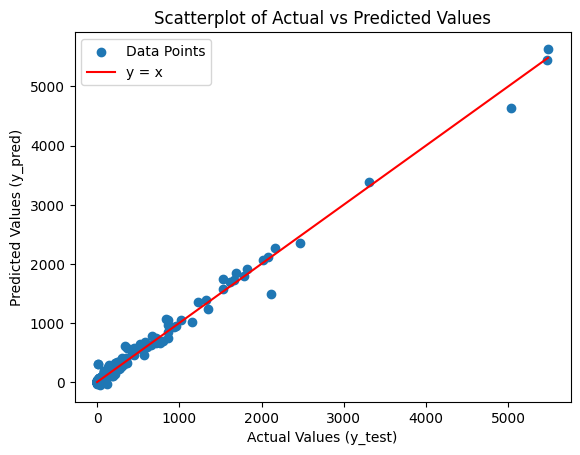


------------------------------------------------------------

Lasso Mean Squared Error: 883.9493736989951
Lasso R-squared: 0.9882482756495885


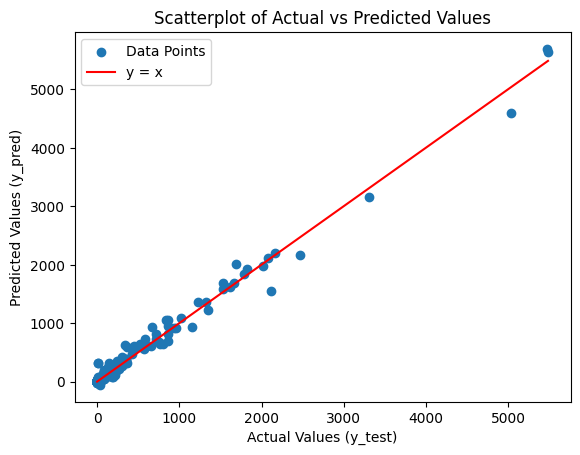


------------------------------------------------------------

DecisionTreeRegressor Mean Squared Error: 1519.404886422232
DecisionTreeRegressor R-squared: 0.9798001696328114


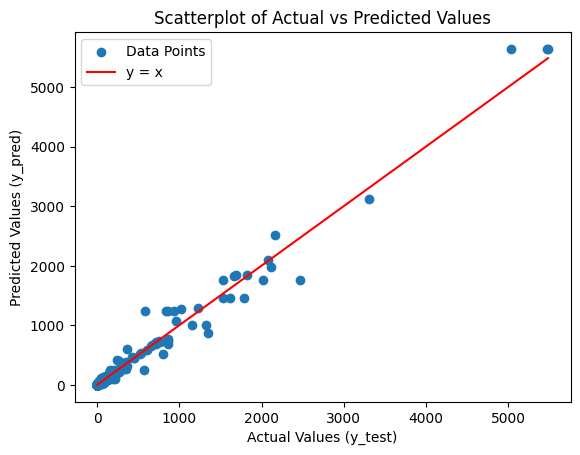


------------------------------------------------------------

RandomForestRegressor Mean Squared Error: 912.6578620108369
RandomForestRegressor R-squared: 0.9878666087225042


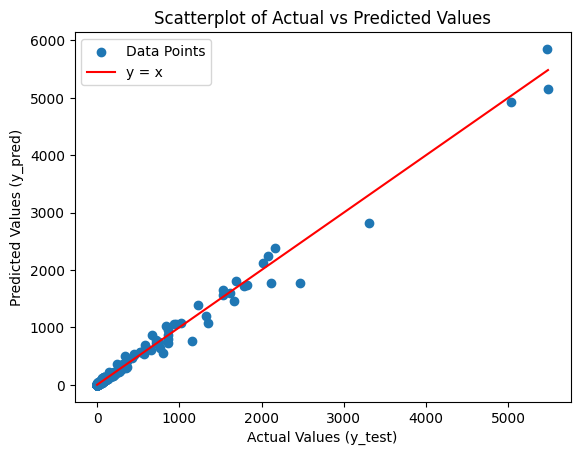


------------------------------------------------------------

The best model after grid search is LinearRegression with Mean Squared Error: 721.5303610162881
Best hyperparameters: {}


In [215]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

# Define your features and target variable
# Assuming 'df' is your DataFrame and 'Death Casuality' is your target variable
X = df.drop(['Entity', 'Year', 'Death Casuality'], axis=1)  # Features
y = df['Death Casuality']  # Target variable

# Select the top k features based on chi-squared test for categorical variables
# Change k to the number of top features you want to select
k_chi2 = 10
chi2_selector = SelectKBest(score_func=chi2, k=k_chi2)
X_chi2_selected = chi2_selector.fit_transform(X, y)

# Select the top k features based on ANOVA F-test for numerical variables
# Change k to the number of top features you want to select
k_f_classif = 10
f_classif_selector = SelectKBest(score_func=f_classif, k=k_f_classif)
X_f_classif_selected = f_classif_selector.fit_transform(X, y)

# Get the selected feature names
selected_chi2_features = X.columns[chi2_selector.get_support()]
selected_f_classif_features = X.columns[f_classif_selector.get_support()]

# Print the selected feature names
print("Top", k_chi2, "features selected using chi-squared test:", selected_chi2_features)
print("Top", k_f_classif, "features selected using ANOVA F-test:", selected_f_classif_features)

# Separate features and target variable
X = df[['Terrorist attacks', 'Terrorism deaths',
       'Attack method: Facility/Infrastructure Attack',
       'Attack method: Hostage Taking (Kidnapping)',
       'Attack method: Assassination', 'Attack method: Armed Assault',
       'Attack method: Bombing/Explosion', 'Terrorist Death Type : Suicide',
       'Terrorist Death Type : Killed', 'Attack Severity Score']]  # Features
y = df['Death Casuality']  # Target variable

# Call the function to perform grid search and train the best model
best_model = grid_search_best_model(X, y)


LinearRegression Mean Squared Error: 869.9243987357813
LinearRegression R-squared: 0.9884347316217212


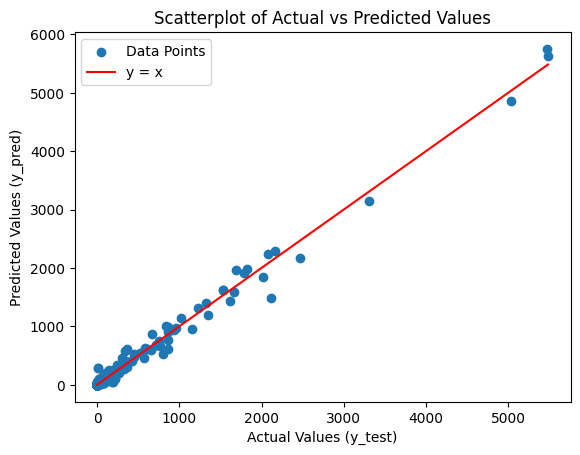


------------------------------------------------------------

Lasso Mean Squared Error: 1216.1840538132567
Lasso R-squared: 0.9838313593684991


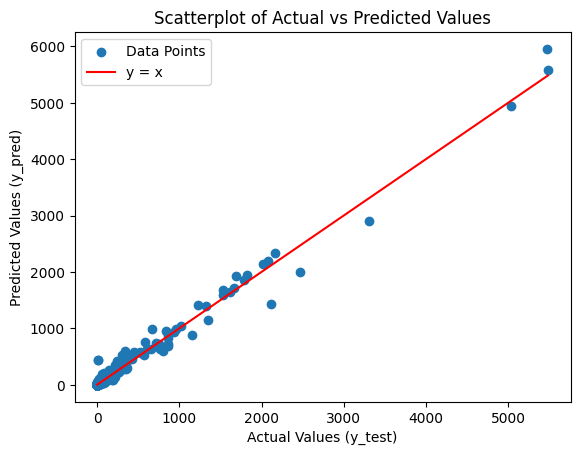


------------------------------------------------------------

DecisionTreeRegressor Mean Squared Error: 2013.745701018422
DecisionTreeRegressor R-squared: 0.9732281224532514


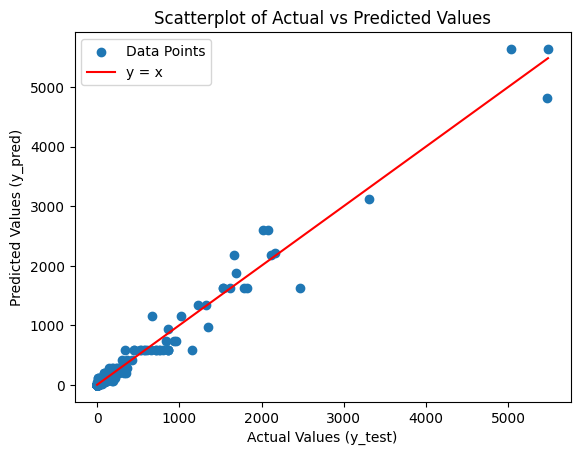


------------------------------------------------------------

RandomForestRegressor Mean Squared Error: 1085.9831924253483
RandomForestRegressor R-squared: 0.9855623234697733


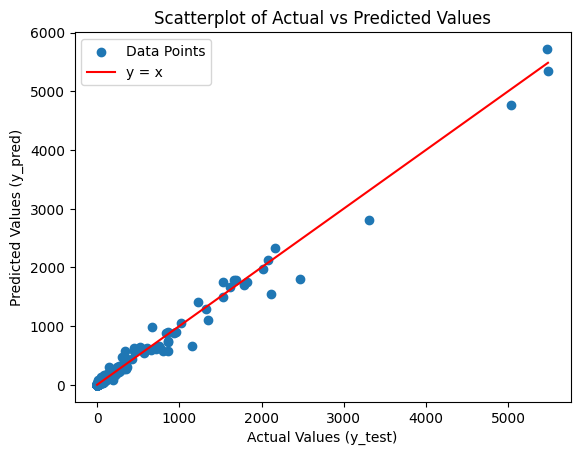


------------------------------------------------------------

The best model after grid search is LinearRegression with Mean Squared Error: 869.9243987357813
Best hyperparameters: {}


In [216]:
# Separate features and target variable
X = df[['Terrorist attacks', 'Terrorism deaths', 'Attack method: Armed Assault',
       'Attack method: Bombing/Explosion', 'Terrorist Death Type : Killed',
       'Attack_Death_Interact', 'Bombing_Death_Interact',
       'Attack Severity Score', 'Attack_Severity_Interact',
       'Year_Attack_Interact']]  # Features
y = df['Death Casuality']  # Target variable

# Call the function to perform grid search and train the best model
best_model = grid_search_best_model(X, y)


RFE

Selected features: Index(['Attack method: Hijacking',
       'Attack method: Hostage Taking (Barricade Incident)',
       'Attack method: Unarmed Assault',
       'Attack method: Facility/Infrastructure Attack',
       'Attack method: Hostage Taking (Kidnapping)',
       'Attack method: Assassination', 'Attack method: Armed Assault',
       'Attack method: Bombing/Explosion', 'Terrorist Death Type : Suicide',
       'Attack Severity Score'],
      dtype='object')
LinearRegression Mean Squared Error: 1976.360941805896
LinearRegression R-squared: 0.9737251366468739


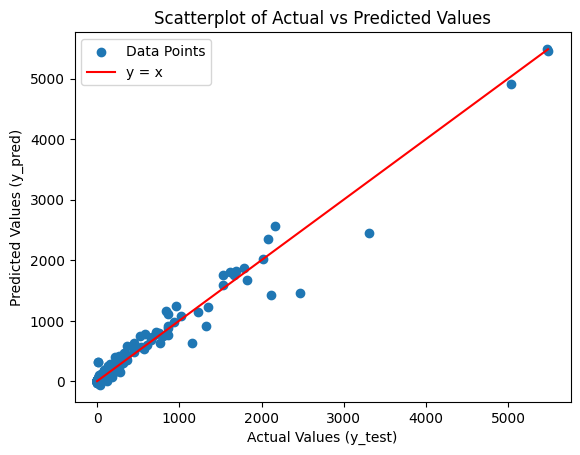


------------------------------------------------------------

Lasso Mean Squared Error: 1986.82196418069
Lasso R-squared: 0.9735860618819271


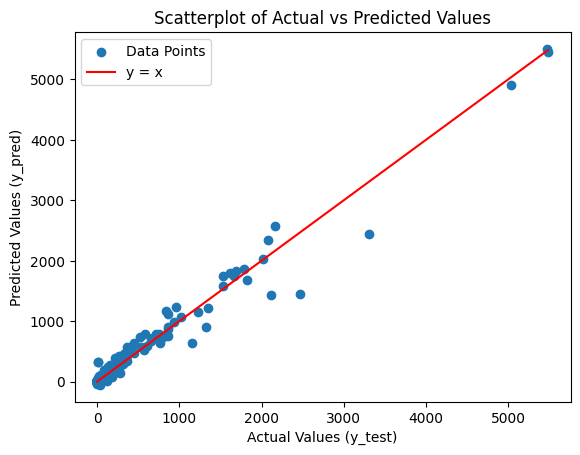


------------------------------------------------------------

DecisionTreeRegressor Mean Squared Error: 4835.862292797642
DecisionTreeRegressor R-squared: 0.9357093037764191


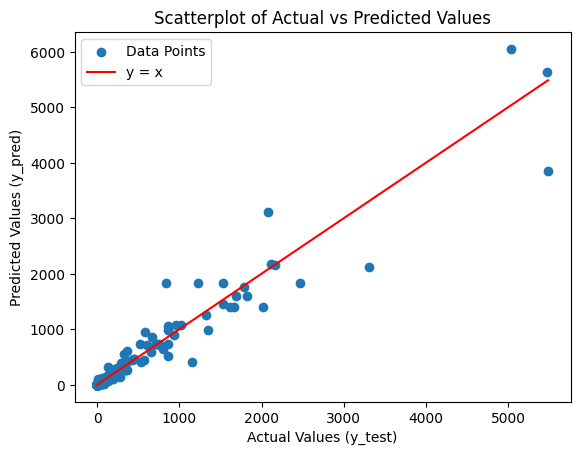


------------------------------------------------------------

RandomForestRegressor Mean Squared Error: 2518.4174296551373
RandomForestRegressor R-squared: 0.9665187302427379


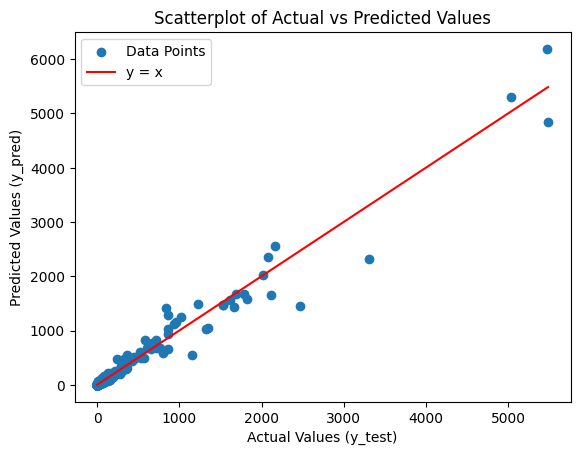


------------------------------------------------------------

The best model after grid search is LinearRegression with Mean Squared Error: 1976.360941805896
Best hyperparameters: {}


In [217]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression  # Replace with appropriate regression model for your problem

# Define your features and target variable
# Assuming 'df' is your DataFrame and 'Death Casuality' is your target variable
X = df.drop(['Entity', 'Year', 'Death Casuality'], axis=1)  # Features
y = df['Death Casuality']  # Target variable

# Define the estimator (model) for RFE
# Replace LinearRegression with the appropriate regression model for your problem
estimator = LinearRegression()

# Define the number of features to select
n_features_to_select = 10  # Change this to the desired number of features

# Initialize RFE
rfe = RFE(estimator=estimator, n_features_to_select=n_features_to_select)

# Fit RFE to the data
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print the selected features
print("Selected features:", selected_features)

# Separate features and target variable
X = df[['Attack method: Hijacking',
       'Attack method: Hostage Taking (Barricade Incident)',
       'Attack method: Unarmed Assault',
       'Attack method: Facility/Infrastructure Attack',
       'Attack method: Hostage Taking (Kidnapping)',
       'Attack method: Assassination', 'Attack method: Armed Assault',
       'Attack method: Bombing/Explosion', 'Terrorist Death Type : Suicide',
       'Attack Severity Score']]  # Features
y = df['Death Casuality']  # Target variable

# Call the function to perform grid search and train the best model
best_model = grid_search_best_model(X, y)


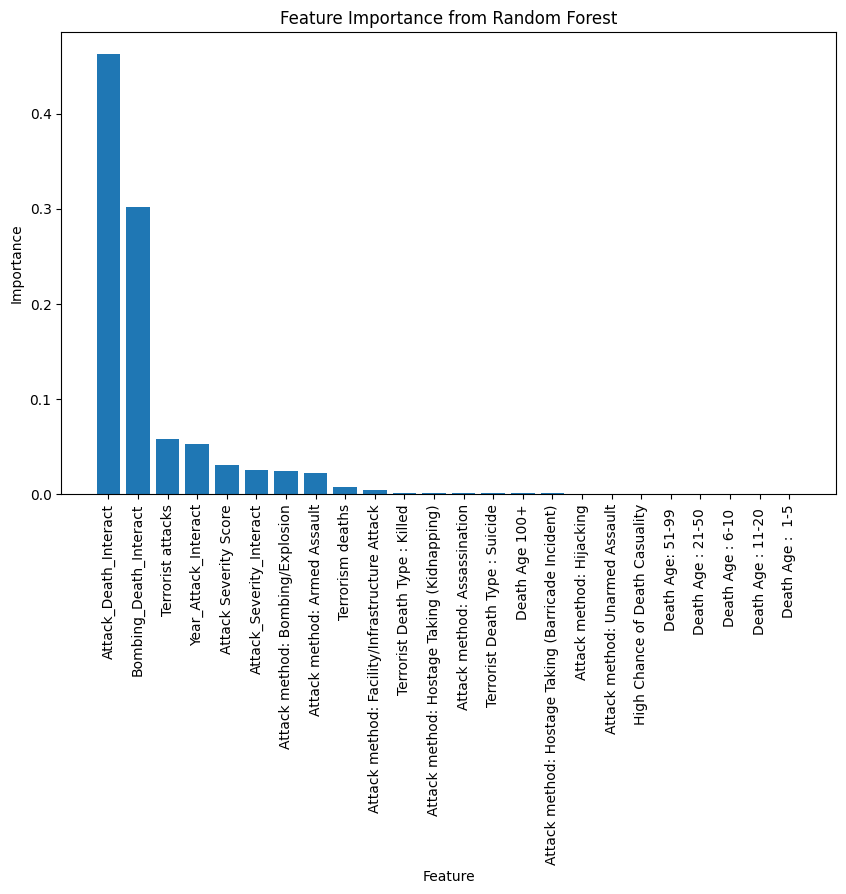

LinearRegression Mean Squared Error: 699.1368755776268
LinearRegression R-squared: 0.9907052778253408


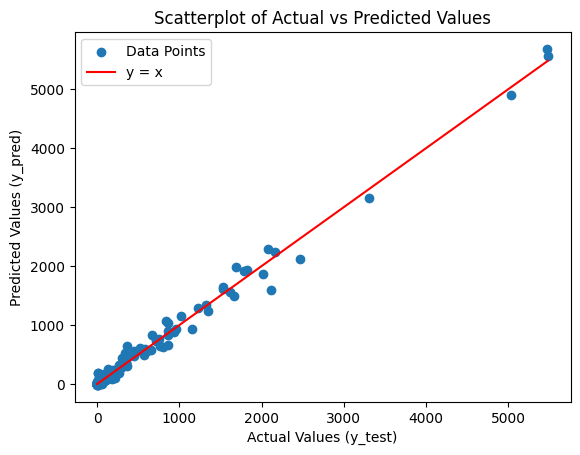


------------------------------------------------------------

Lasso Mean Squared Error: 824.5889433867054
Lasso R-squared: 0.9890374468794212


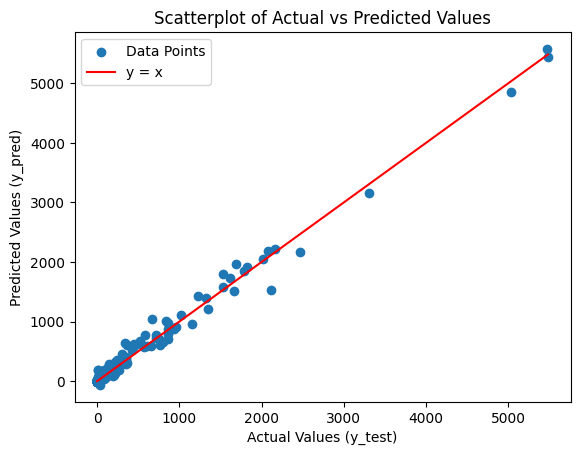


------------------------------------------------------------

DecisionTreeRegressor Mean Squared Error: 3313.4903475133538
DecisionTreeRegressor R-squared: 0.955948579907037


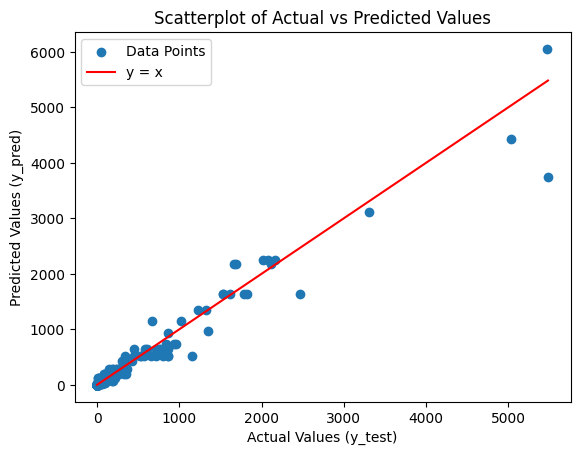


------------------------------------------------------------

RandomForestRegressor Mean Squared Error: 1043.695858923836
RandomForestRegressor R-squared: 0.9861245152667358


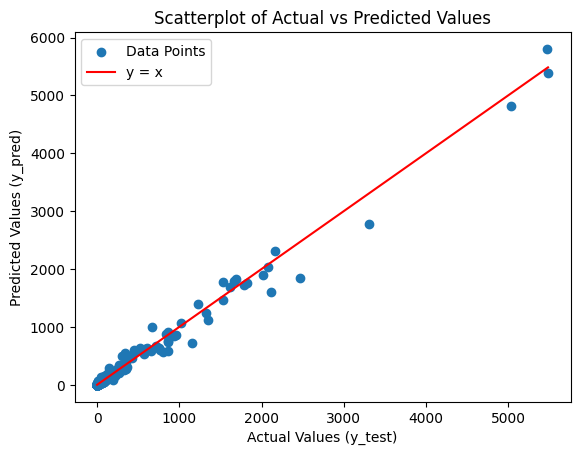


------------------------------------------------------------

The best model after grid search is LinearRegression with Mean Squared Error: 699.1368755776268
Best hyperparameters: {}


In [218]:
from sklearn.ensemble import RandomForestRegressor  
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Death Casuality' is your target variable
X = df.drop(['Entity', 'Year', 'Death Casuality'], axis=1)  # Features
y = df['Death Casuality']  # Target variable

# Initialize a Random Forest model
rf_model = RandomForestRegressor()

# Fit the model to your data
rf_model.fit(X, y)

# Extract feature importance
feature_importance = rf_model.feature_importances_

# Sort feature importance in descending order
sorted_idx = feature_importance.argsort()[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importance[sorted_idx], align="center")
plt.xticks(range(X.shape[1]), X.columns[sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance from Random Forest")
plt.show()

top_10_features = X.columns[sorted_idx][:10].tolist()
top_10_features

# Separate features and target variable
X = df[top_10_features]  # Features
y = df['Death Casuality']  # Target variable

# Call the function to perform grid search and train the best model
best_model = grid_search_best_model(X, y)

lasso

Train R^2 score: 0.9953486386124691
Test R^2 score: 0.9924887171304368
Selected features: Index(['Terrorist attacks', 'Terrorism deaths', 'Attack method: Hijacking',
       'Attack method: Hostage Taking (Barricade Incident)',
       'Attack method: Unarmed Assault',
       'Attack method: Facility/Infrastructure Attack',
       'Attack method: Assassination', 'Attack method: Armed Assault',
       'Attack method: Bombing/Explosion', 'Death Age 100+',
       'Death Age: 51-99 ', 'Death Age : 21-50 ', 'Death Age : 11-20 ',
       'Death Age : 6-10 ', 'Terrorist Death Type : Suicide',
       'Terrorist Death Type : Killed', 'Bombing_Death_Interact',
       'Year_Attack_Interact', 'High Chance of Death Casuality'],
      dtype='object')
LinearRegression Mean Squared Error: 471.59202346103297
LinearRegression R-squared: 0.9937303881529147


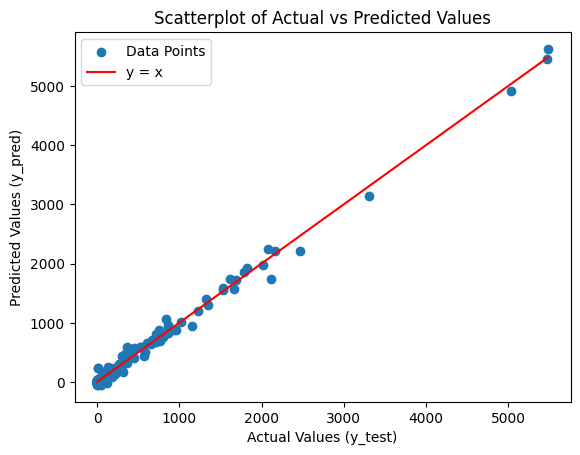


------------------------------------------------------------

Lasso Mean Squared Error: 556.7489163947025
Lasso R-squared: 0.992598264117229


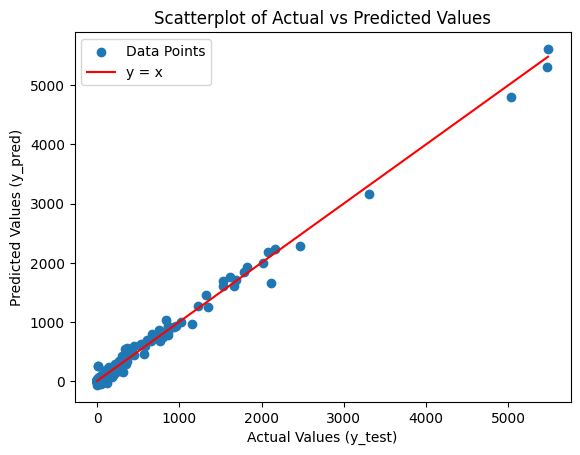


------------------------------------------------------------

DecisionTreeRegressor Mean Squared Error: 2695.0793770384257
DecisionTreeRegressor R-squared: 0.9641700861114936


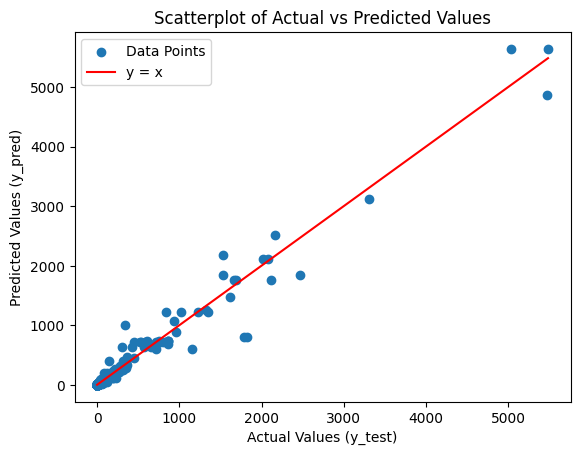


------------------------------------------------------------

RandomForestRegressor Mean Squared Error: 1035.022782419882
RandomForestRegressor R-squared: 0.986239820065152


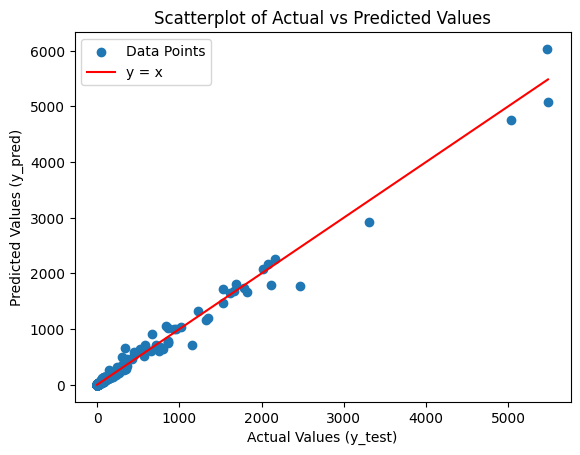


------------------------------------------------------------

The best model after grid search is LinearRegression with Mean Squared Error: 471.59202346103297
Best hyperparameters: {}


In [219]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'Death Casuality' is your target variable
X = df.drop(['Entity', 'Year', 'Death Casuality'], axis=1)  # Features
y = df['Death Casuality']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Lasso regression model
lasso = Lasso(alpha=0.1)  # Adjust the regularization strength with the alpha parameter

# Fit the model to the training data
lasso.fit(X_train_scaled, y_train)

# Evaluate the model
train_score = lasso.score(X_train_scaled, y_train)
test_score = lasso.score(X_test_scaled, y_test)

# Print the model performance
print("Train R^2 score:", train_score)
print("Test R^2 score:", test_score)

# Print the selected features with non-zero coefficients
selected_features = X.columns[lasso.coef_ != 0]
print("Selected features:", selected_features)

# Separate features and target variable
X = df[['Terrorist attacks', 'Terrorism deaths', 'Attack method: Hijacking',
       'Attack method: Hostage Taking (Barricade Incident)',
       'Attack method: Unarmed Assault',
       'Attack method: Facility/Infrastructure Attack',
       'Attack method: Assassination', 'Attack method: Armed Assault',
       'Attack method: Bombing/Explosion', 'Death Age 100+',
       'Death Age: 51-99 ', 'Death Age : 21-50 ', 'Death Age : 11-20 ',
       'Death Age : 6-10 ', 'Terrorist Death Type : Suicide',
       'Terrorist Death Type : Killed', 'Bombing_Death_Interact',
       'Year_Attack_Interact', 'High Chance of Death Casuality']]  # Features
y = df['Death Casuality']  # Target variable

# Call the function to perform grid search and train the best model
best_model = grid_search_best_model(X, y)

PCA

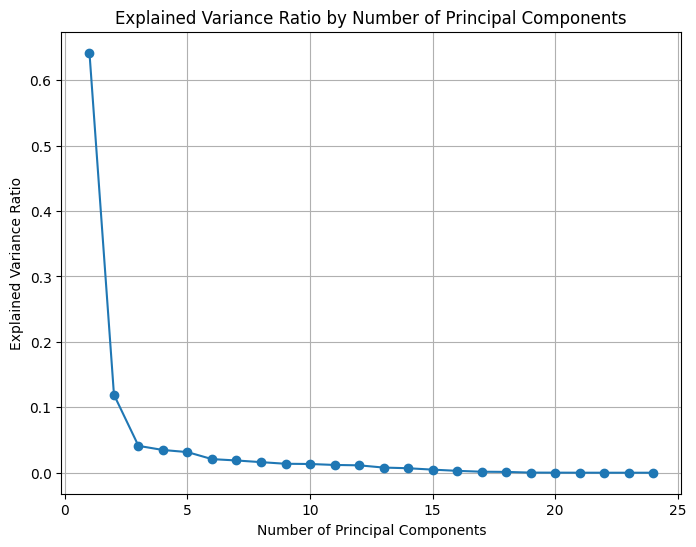

Number of principal components to retain: 10


In [220]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Death Casuality' is your target variable
X = df.drop(['Entity', 'Year', 'Death Casuality'], axis=1)  # Features
y = df['Death Casuality']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize PCA
pca = PCA()

# Fit PCA to the scaled data
pca.fit(X_scaled)

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Principal Components')
plt.grid(True)
plt.show()

# Select the number of principal components to retain based on the explained variance ratio
# You can choose a threshold, such as 95% explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

print("Number of principal components to retain:", n_components)

# Perform dimensionality reduction using the selected number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Now X_pca contains the transformed data with reduced dimensionality


In [221]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# Split the data into features (X) and target variable (y)
X = df.drop(['Entity','Death Casuality','Year'], axis=1)
y = df['Death Casuality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardize the numerical features using StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# Apply PCA
pca = PCA()
pca.fit(X_train_scaled)

# Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame with column names and their explained variance
variance_df = pd.DataFrame({'Feature': X_train_scaled.columns, 'Explained Variance': explained_variance_ratio})

# Print the DataFrame
variance_df['Explained Variance']=round(variance_df['Explained Variance']*100,2)


variance_df=variance_df.sort_values(['Explained Variance'],ascending=False)


variance_df['Cumulative Variance'] = np.cumsum(variance_df['Explained Variance'])


variance_df


Feature  Explained Variance  \
0                                   Terrorist attacks               65.07   
1                                    Terrorism deaths               12.04   
2                            Attack method: Hijacking                4.05   
3   Attack method: Hostage Taking (Barricade Incid...                3.41   
4                      Attack method: Unarmed Assault                3.08   
5       Attack method: Facility/Infrastructure Attack                1.98   
6          Attack method: Hostage Taking (Kidnapping)                1.82   
7                        Attack method: Assassination                1.47   
8                        Attack method: Armed Assault                1.29   
9                    Attack method: Bombing/Explosion                1.25   
10                                     Death Age 100+                1.19   
11                                  Death Age: 51-99                 1.10   
12                                 Death Age : 21-50                 0.70   
13                                 Death Age : 11-20                 0.64   
14                                  Death Age : 6-10                 0.38   
15                                   Death Age :  1-5                0.26   
16                     Terrorist Death Type : Suicide                0.13   
17                      Terrorist Death Type : Killed                0.11   
18                              Attack_Death_Interact                0.02   
19                             Bombing_Death_Interact                0.01   
20                              Attack Severity Score                0.00   
21                           Attack_Severity_Interact                0.00   
22                               Year_Attack_Interact                0.00   
23                     High Chance of Death Casuality                0.00   

    Cumulative Variance  
0                 65.07  
1                 77.11  
2                 81.16  
3                 84.57  
4                 87.65  
5                 89.63  
6                 91.45  
7                 92.92  
8                 94.21  
9                 95.46  
10                96.65  
11                97.75  
12                98.45  
13                99.09  
14                99.47  
15                99.73  
16                99.86  
17                99.97  
18                99.99  
19               100.00  
20               100.00  
21               100.00  
22               100.00  
23               100.00

In [222]:
def find_features_below_threshold(df, threshold=94):
    """
    Find the list of feature names whose cumulative variance is below the specified threshold.

    Parameters:
    - df: DataFrame with 'Feature', 'Explained Variance', and 'Cumulative Variance' columns.
    - threshold: Cumulative variance threshold (default is 94).

    Returns:
    - List of feature names with cumulative variance below the threshold.
    """
    # Filter rows where Cumulative Variance is below the threshold
    below_threshold_df = df[df['Cumulative Variance'] < threshold]

    # If there are columns below the threshold, return the list of feature names
    if not below_threshold_df.empty:
        features_below_threshold = below_threshold_df['Feature'].tolist()
        return features_below_threshold
    else:
        return None

# Example usage
features_below_threshold = find_features_below_threshold(variance_df)
print(f"Features with cumulative variance below 94%: {features_below_threshold}")


Features with cumulative variance below 94%: ['Terrorist attacks', 'Terrorism deaths', 'Attack method: Hijacking', 'Attack method: Hostage Taking (Barricade Incident)', 'Attack method: Unarmed Assault', 'Attack method: Facility/Infrastructure Attack', 'Attack method: Hostage Taking (Kidnapping)', 'Attack method: Assassination']


LinearRegression Mean Squared Error: 855.1455198167223
LinearRegression R-squared: 0.9886312104206575


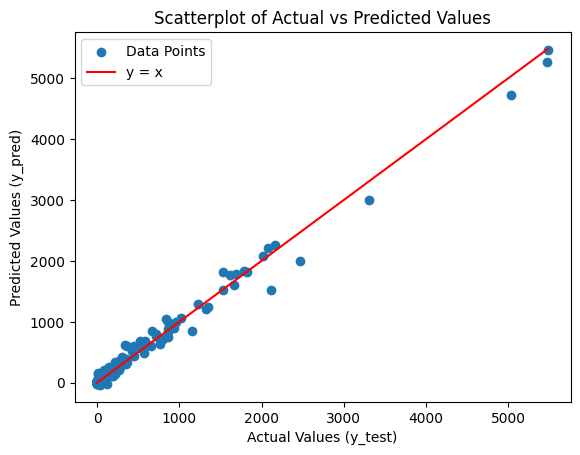


------------------------------------------------------------

Lasso Mean Squared Error: 856.2905977851492
Lasso R-squared: 0.9886159871046566


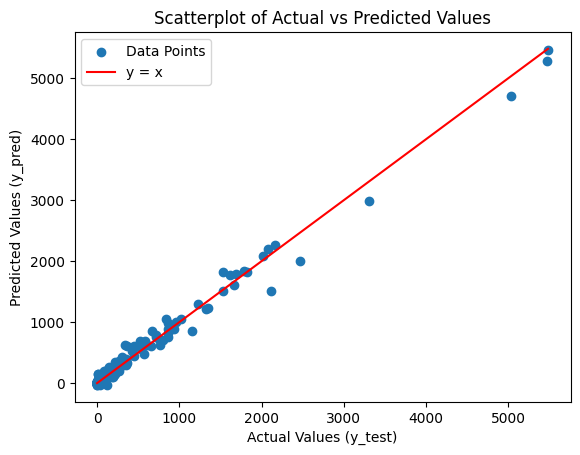


------------------------------------------------------------

DecisionTreeRegressor Mean Squared Error: 4676.635532403055
DecisionTreeRegressor R-squared: 0.9378261546425903


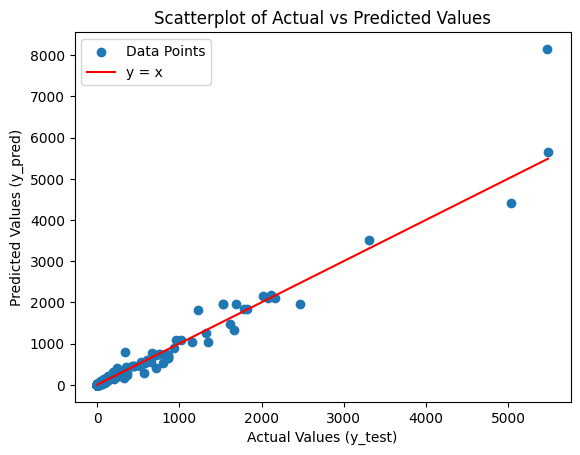


------------------------------------------------------------

RandomForestRegressor Mean Squared Error: 1427.736705912177
RandomForestRegressor R-squared: 0.9810188584187427


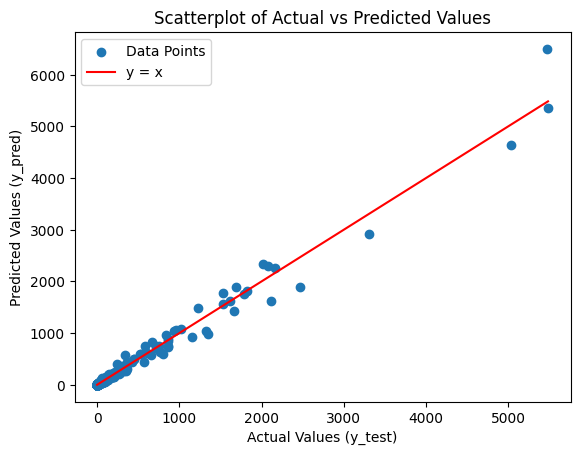


------------------------------------------------------------

The best model after grid search is LinearRegression with Mean Squared Error: 855.1455198167223
Best hyperparameters: {}


In [223]:
# Separate features and target variable
X = df[['Terrorist attacks', 'Terrorism deaths', 'Attack method: Hijacking', 
        'Attack method: Hostage Taking (Barricade Incident)', 'Attack method: Unarmed Assault', 
        'Attack method: Facility/Infrastructure Attack', 'Attack method: Hostage Taking (Kidnapping)', 
        'Attack method: Assassination']]  # Features
y = df['Death Casuality']  # Target variable

# Call the function to perform grid search and train the best model
best_model = grid_search_best_model(X, y)

Forward Feature Selection

In [224]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize an empty set of selected features
selected_features = []
best_score = float('inf')  # Initialize with a large value for MSE

# Define the target variable and features
X = df.drop(['Entity', 'Death Casuality'], axis=1)  # Features
y = df['Death Casuality']  # Target variable

# Initialize the linear regression model
model = LinearRegression()

# Stopping criterion: Maximum number of features
max_features = 20

# Forward feature selection
for i in range(max_features):
    best_feature = None
    best_mse = float('inf')
    
    # Iterate over features not yet selected
    for feature in X.columns:
        if feature not in selected_features:
            # Train the model with the selected features plus one additional feature
            features_to_use = selected_features + [feature]
            X_subset = X[features_to_use]
            model.fit(X_subset, y)
            y_pred = model.predict(X_subset)
            
            # Evaluate performance using mean squared error
            mse = mean_squared_error(y, y_pred)
            
            # Update best feature if it improves performance
            if mse < best_mse:
                best_mse = mse
                best_feature = feature
    
    # Add the best feature to the set of selected features
    selected_features.append(best_feature)
    
    # Update the model with the selected features
    X_subset = X[selected_features]
    model.fit(X_subset, y)
    y_pred = model.predict(X_subset)
    
    # Update the best score
    best_score = mean_squared_error(y, y_pred)
    
    print(f"Iteration {i+1}: Selected feature: {best_feature}, MSE: {best_mse}")

print("Forward feature selection completed.")
print("Selected features:", selected_features)
print("Best MSE:", best_score)


Iteration 1: Selected feature: Year_Attack_Interact, MSE: 1489.4928315617447
Iteration 2: Selected feature: Terrorism deaths, MSE: 954.6901219592085
Iteration 3: Selected feature: Death Age 100+, MSE: 586.5962604817096
Iteration 4: Selected feature: Attack method: Facility/Infrastructure Attack, MSE: 471.7542354604547
Iteration 5: Selected feature: Terrorist attacks, MSE: 415.70351613019153
Iteration 6: Selected feature: Attack method: Hostage Taking (Barricade Incident), MSE: 382.69363517592114
Iteration 7: Selected feature: Attack method: Assassination, MSE: 364.36753362288306
Iteration 8: Selected feature: Attack method: Hostage Taking (Kidnapping), MSE: 349.51797521912715
Iteration 9: Selected feature: Attack_Death_Interact, MSE: 338.9342435939325
Iteration 10: Selected feature: Death Age: 51-99 , MSE: 333.06998915779263
Iteration 11: Selected feature: Attack_Severity_Interact, MSE: 328.46976349276713
Iteration 12: Selected feature: Attack method: Unarmed Assault, MSE: 324.97922724

Backward Feature Elimination:

In [225]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the target variable and features
X = df.drop(['Entity', 'Death Casuality'], axis=1)  # Features
y = df['Death Casuality']  # Target variable

# Initialize the linear regression model
model = LinearRegression()

# Stopping criterion: Minimum number of features
min_features = 5

# Backward feature elimination
while len(X.columns) > min_features:
    # Train the model with all features
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Evaluate performance using mean squared error
    mse_all = mean_squared_error(y, y_pred)
    
    # Initialize variables to track the feature to remove and its MSE
    feature_to_remove = None
    best_mse = float('inf')
    
    # Iterate over features to find the one to remove
    for feature in X.columns:
        # Train the model without the current feature
        X_subset = X.drop(feature, axis=1)
        model.fit(X_subset, y)
        y_pred = model.predict(X_subset)
        
        # Evaluate performance using mean squared error
        mse_subset = mean_squared_error(y, y_pred)
        
        # Update the best feature to remove if it improves performance
        if mse_subset < best_mse:
            best_mse = mse_subset
            feature_to_remove = feature
    
    # Remove the feature that contributes the least
    X = X.drop(feature_to_remove, axis=1)
    
    # Update the model with the remaining features
    model.fit(X, y)
    y_pred = model.predict(X)
    
    print(f"Removed feature: {feature_to_remove}, MSE: {best_mse}")

print("Backward feature elimination completed.")
print("Remaining features:", X.columns)



Removed feature: Attack method: Hijacking, MSE: 312.18711315488434
Removed feature: Terrorism deaths, MSE: 312.187113154885
Removed feature: Death Age :  1-5, MSE: 312.19681926259557
Removed feature: Attack method: Unarmed Assault, MSE: 312.2108002476997
Removed feature: Death Age : 11-20 , MSE: 312.3110945022922
Removed feature: Attack method: Hostage Taking (Barricade Incident), MSE: 312.50246824194943
Removed feature: Year, MSE: 312.7421969107176
Removed feature: Death Age : 21-50 , MSE: 313.186635234006
Removed feature: Death Age : 6-10 , MSE: 313.57768263488384
Removed feature: Attack_Severity_Interact, MSE: 314.7220025046332
Removed feature: High Chance of Death Casuality, MSE: 316.2633483484034
Removed feature: Bombing_Death_Interact, MSE: 318.4881400579818
Removed feature: Death Age: 51-99 , MSE: 323.6463116587703
Removed feature: Attack_Death_Interact, MSE: 332.1021045318223
Removed feature: Attack method: Hostage Taking (Kidnapping), MSE: 341.16908865101294
Removed feature: A